## The K-means clusters identified are saved in the cluster excel file - uses random state = 1

# Part 0: Load in Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import localcider
from localcider.sequenceParameters import SequenceParameters
import re
import math
import scipy
from scipy.stats import ks_2samp
from matplotlib.patches import Rectangle
import pathlib
from matplotlib import font_manager
from matplotlib.pyplot import gcf


# Setup the fonts
fonts_path = pathlib.Path.home().joinpath('fonts') # i.e. `~/fonts` (update as needed)
font_filename = 'ARIAL.TTF'
font_path = fonts_path.joinpath(font_filename)
print(font_path)

font_manager.fontManager.addfont(str(font_path))
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42

COLOR_MAP = dict()
COLOR_MAP['A']         = '#8c8c8c'
COLOR_MAP['CHNQST']    = '#077a15'
COLOR_MAP['DE']        = '#e23a36'
COLOR_MAP['FWY']       = '#f58220'
COLOR_MAP['G']         = '#86bd8d'
COLOR_MAP['ILMV']      = '#231f20'
COLOR_MAP['KR']        = '#1725c2'
COLOR_MAP['P']         = '#c25fc9'


# Using the global color map, we convert the colormap of amino acid
# groups, to a map against individual amino acids. This
# serves as our internal color map which is used for styling.
aacolor_map=dict()
for amino_acids in COLOR_MAP:
    for amino_acid in amino_acids:
        aacolor_map[amino_acid] = COLOR_MAP[amino_acids]

/home/research/kiersten.ruff/fonts/ARIAL.TTF


# Part 1: Get all IDR data

## 1.1 - Load in All Sapiens Disordered Stretches >=30

In [2]:
# uses nardini_env
import pandas as pd
import seaborn as sbn

speciesname='sapiens'

# Gene names table
mapdf=pd.read_table('../general_data/sapiens_uniprot_gene_name.tsv')
accsmap=mapdf['Uniprot'].tolist()
genesmap=mapdf['Gene'].tolist()

myseqs=[]
fullaccswnums=[]
goodidxs=[]
badidxs=[]
fullaccs=[]
mygenes=[]
seqlens=[]

myfile = open('../general_data/idrs_min_length_30/'+speciesname, 'r')
Lines = myfile.readlines()

count=0
for line in Lines:
    count=count+1
    fullline=line.split(" ")
    tmpseq=fullline[3]
    tmpacc=fullline[0]
    currseq=tmpseq.strip('\n')
    
    if len(currseq)>=30 and "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
        myseqs.append(currseq)
        fullaccswnums.append(tmpacc)
        goodidxs.append(count)
        seqlens.append(len(currseq))
        tmp=tmpacc.split("_")
        fullaccs.append(tmp[0])
        if tmp[0] in accsmap:
            currgidx=accsmap.index(tmp[0])
            mygenes.append(genesmap[currgidx]+' IDR'+tmp[1])
        else:
            mygenes.append(tmp[0]+' IDR'+tmp[1])
    else:
        badidxs.append(count)
        
print(len(myseqs))
print(count)
print(len(goodidxs))
print(badidxs)
#print(mygenes)

24508
24535
24508
[337, 338, 5387, 7965, 8270, 8860, 9309, 13434, 18343, 20894, 20895, 20896, 20897, 20898, 20900, 20901, 20902, 20903, 20904, 20905, 20906, 20907, 20908, 20909, 21628, 22016, 23960]


## 1.2 - Load NARDINI data for all sapiens IDRs gte 30

In [4]:
import numpy as np
zvec=np.load('../general_data/'+speciesname+'_full_idrome_gte_30_nardini.npy')
#print(zvec)

# check vector
idx=fullaccswnums.index('Q8NFD5_1')
print(myseqs[idx])
print(zvec[idx])
print(zvec[idx][21])
print(len(zvec))

myfeat=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly','Frac A','Frac C','Frac D','Frac E','Frac F','Frac G','Frac H','Frac I','Frac K','Frac L','Frac M','Frac N','Frac P','Frac Q','Frac R','Frac S','Frac T','Frac V','Frac W','Frac Y','Frac K+R','Frac D+E','Frac Polar','Frac Aliphatic','Frac Aromatic','R/K Ratio','E/D Ratio','Frac Chain Expanding','FCR','NCPR','Hydrophobicity','Disorder Promoting','Iso point','PPII','A Patch','C Patch','D Patch','E Patch','F Patch','G Patch','H Patch','I Patch','K Patch','L Patch','M Patch','N Patch','P Patch','Q Patch','R Patch','S Patch','T Patch','V Patch','Y Patch','RG Frac']

myfeatnardini=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly']

print(len(myfeat))

MAHNAGAAAAAGTHSAKSGGSEAALKEGGSAAALSSSSSSSAAAAAASSSSSSGPGSAMETGLLPNHKLKTVGEAPAAPPHQQHHHHHHAHHHHHHAHHLHHHHALQQQLNQFQQQQQQQQQQQQQQQQQQHPISNNNSLGGAGGGAPQPGPDMEQPQHGGAKDSAAGGQADPPGPPLLSKPGDEDDAPPKMGEPAGGRYEHPGLGALGTQQPPVAVPGGGGGPAAVPEFNNYYGSAAPASGGPGGRAGPCFDQHGGQQSPGMGMMHSASAAAAGAPGSMDPLQNSHEGYPNSQCNHYPGYSRPGAGGGGGGGGGGGGGSGGGGGGGGAGAGGAGAGAVAAAAAAAAAAAGGGGGGGYGGSSAGYGVLSSPRQQGGGMMMGPGGGGAASLSKAAAGSAAGGFQRFAGQNQHPSGATPTLNQLLTSPSPMMRSYGGSYPEYSSPSAPPPPPSQPQSQAAAAGAAAGGQQAAAGMGLGKD
[10.59108354  0.          0.          0.          0.         11.65941098
  0.         14.39589484  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  5.76110201  0.          7.43819192  0.          0.          7.20103122]
0.0
24508
90


## 1.3 - Get all other sequence features for the sapiens IDRome

[0.07741329870246792, 0.008538805724799583, 0.05127727736370751, 0.09008763614629162, 0.014270327223274142, 0.08332631606660568, 0.023213564275380197, 0.01785675831127527, 0.06098073687889461, 0.05867819723550179, 0.016164841817388885, 0.030837123165538154, 0.11307352429649098, 0.05451395702245792, 0.06577801431451794, 0.12502566544640797, 0.05722109753347246, 0.03588171932609476, 0.005580771458323423, 0.010280367691109179, 0.12675875119341254, 0.14136491350999913, 0.38267652923466194, 0.20599481539272863, 0.030131466372706743, 0.05493351039784072, 0.1841411803139005, 0.3811971889999026, 0.26812366470341165, -0.01460616231658658, 3.4110708906101537, 0.8019110880466948, 7.44443247900792, 0.4044778171527079, 0.013228570102474755, 2.8313019279589203e-06, 0.00565433376114803, 0.024103760059206916, 1.1039838114785175e-05, 0.023394616782112673, 0.0014528601714245697, 1.625241407649792e-05, 0.012782162346973061, 0.0011648168919885275, 9.498442431682362e-05, 0.0008614367526042599, 0.0403653516

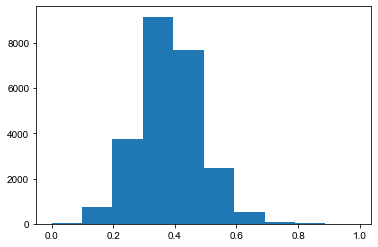

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import localcider
from localcider.sequenceParameters import SequenceParameters
import re

numInt=2 # Number of allowable interruption residues
minBlockLen=4 # Must have at least minBlockLen lysines in the block

aas='ACDEFGHIKLMNPQRSTVY' # For pathces - no W patch in proteome so this is removed
#aas='CEK'

filename=[speciesname]

for fname in filename:
    myfile = open('../general_data/idrs_min_length_30/'+fname, 'r')
    Lines = myfile.readlines()
    fracA=[]
    fracC=[]
    fracD=[]
    fracE=[]
    fracF=[]
    fracG=[]
    fracH=[]
    fracI=[]
    fracK=[]
    fracL=[]
    fracM=[]
    fracN=[]
    fracP=[]
    fracQ=[]
    fracR=[]
    fracS=[]
    fracT=[]
    fracV=[]
    fracW=[]
    fracY=[]
    fracpos=[]
    fracneg=[]
    fracpol=[]
    fracali=[]
    fracaro=[]
    fracRtoK=[]
    fracEtoD=[]
    fracexp=[]
    fcr=[]
    ncpr=[]
    mhydro=[]
    dispro=[]
    isopoi=[]
    ppii=[]
    fracpatch=[[] for _ in range(len(aas))]
    rgpatch=[]
    
    for line in Lines:
        fullline=line.split(" ")
        tmpseq=fullline[3]
        currseq=tmpseq.strip('\n')

        if len(currseq)>=30 and "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
            SeqOb = SequenceParameters(currseq)
            slen=SeqOb.get_length()
            aafrac=SeqOb.get_amino_acid_fractions()
            
            fracexp.append(SeqOb.get_fraction_expanding())
            fcr.append(SeqOb.get_FCR())
            ncpr.append(SeqOb.get_NCPR())
            mhydro.append(SeqOb.get_mean_hydropathy())
            dispro.append(SeqOb.get_fraction_disorder_promoting())
            isopoi.append(SeqOb.get_isoelectric_point())
            ppii.append(SeqOb.get_PPII_propensity(mode='hilser'))

            ## AA Fractions
            fracA.append(aafrac['A'])
            fracC.append(aafrac['C'])
            fracD.append(aafrac['D'])
            fracE.append(aafrac['E'])
            fracF.append(aafrac['F'])
            fracG.append(aafrac['G'])
            fracH.append(aafrac['H'])
            fracI.append(aafrac['I'])
            fracK.append(aafrac['K'])
            fracL.append(aafrac['L'])
            fracM.append(aafrac['M'])
            fracN.append(aafrac['N'])
            fracP.append(aafrac['P'])
            fracQ.append(aafrac['Q'])
            fracR.append(aafrac['R'])
            fracS.append(aafrac['S'])
            fracT.append(aafrac['T'])
            fracV.append(aafrac['V'])
            fracW.append(aafrac['W'])
            fracY.append(aafrac['Y'])

            ## AA Physicochemical properties
            fracpos.append(aafrac['K']+aafrac['R'])
            fracneg.append(aafrac['D']+aafrac['E'])
            fracpol.append(aafrac['Q']+aafrac['N']+aafrac['S']+aafrac['T']+aafrac['G']+aafrac['C']+aafrac['H'])
            fracali.append(aafrac['A']+aafrac['L']+aafrac['M']+aafrac['I']+aafrac['V'])
            fracaro.append(aafrac['F']+aafrac['W']+aafrac['Y'])
            
            ## AA ratios
            fracRtoK.append(np.log10(((slen*aafrac['R'])+1)/((slen*aafrac['K'])+1)))
            fracEtoD.append(np.log10(((slen*aafrac['E'])+1)/((slen*aafrac['D'])+1)))
            
            ## Fraction of sequence containing patches
            counta=-1
            for a in aas:
                counta=counta+1
                justKs='0'*len(currseq) # Set string of zeros

                pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

                # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
                pos2=pos
                for p in range(0,len(pos)-1):
                    tdi=pos[p+1]-pos[p]
                    if tdi > 1 and tdi<=numInt+1:
                        myt=list(range(pos[p]+1,pos[p+1]))
                        for item in myt:
                            pos2.append(item)


                # For positions make those 1 in string of zeros   
                justKs = list(justKs)
                for p in pos2:
                    justKs[p]='1'
                justKs = ''.join(justKs)


                the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
                idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

                numpatches=0
                count=-1
                patchescombined=''
                for o in the_ones:
                    count=count+1
                    myrange=idx_ones[count] # Get indices for each consecutive strength
                    subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
                    pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
                    # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
                    if len(pos3)>=minBlockLen:
                        numpatches=numpatches+1
                        patchescombined+=subseq

                fracpatch[counta].append(len(patchescombined)/len(currseq))
                
            ## Fraction of sequence in RG stretch
            justKs='0'*len(currseq) # Set string of zeros
            pos=[i for i, ltr in enumerate(currseq) if ltr == 'R' or ltr == 'G'] # Find positions of Rs and Gs

            # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
            pos2=pos
            for p in range(0,len(pos)-1):
                tdi=pos[p+1]-pos[p]
                if tdi > 1 and tdi<=numInt+1:
                    myt=list(range(pos[p]+1,pos[p+1]))
                    for item in myt:
                        pos2.append(item)

            # For positions make those 1 in string of zeros             
            justKs = list(justKs)
            for p in pos2:
                justKs[p]='1'
            justKs = ''.join(justKs)

            the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
            idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

            count=-1
            patchescombined=''
            for o in the_ones:
                count=count+1
                myrange=idx_ones[count] # Get indices for each consecutive strength
                subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
                pos3=subseq.count('RG')
                #print(subseq)
                if pos3>=2:
                    patchescombined+=subseq

            rgpatch.append(len(patchescombined)/len(currseq))

    meanvals_sapiens=[np.mean(fracA), np.mean(fracC), np.mean(fracD), np.mean(fracE), np.mean(fracF), np.mean(fracG), np.mean(fracH), np.mean(fracI), np.mean(fracK), np.mean(fracL), np.mean(fracM), np.mean(fracN), np.mean(fracP), np.mean(fracQ), np.mean(fracR), np.mean(fracS), np.mean(fracT), np.mean(fracV), np.mean(fracW), np.mean(fracY), np.mean(fracpos), np.mean(fracneg), np.mean(fracpol), np.mean(fracali), np.mean(fracaro), np.mean(fracRtoK), np.mean(fracEtoD), np.mean(fracexp), np.mean(fcr), np.mean(ncpr), np.mean(mhydro), np.mean(dispro), np.mean(isopoi), np.mean(ppii)]
    stdvals_sapiens=[np.std(fracA), np.std(fracC), np.std(fracD), np.std(fracE), np.std(fracF), np.std(fracG), np.std(fracH), np.std(fracI), np.std(fracK), np.std(fracL), np.std(fracM), np.std(fracN), np.std(fracP), np.std(fracQ), np.std(fracR), np.std(fracS), np.std(fracT), np.std(fracV), np.std(fracW), np.std(fracY), np.std(fracpos), np.std(fracneg), np.std(fracpol), np.std(fracali), np.std(fracaro), np.std(fracRtoK), np.std(fracEtoD), np.std(fracexp), np.std(fcr), np.std(ncpr), np.std(mhydro), np.std(dispro), np.std(isopoi), np.std(ppii)]
    
    for a in fracpatch:
        meanvals_sapiens.append(np.mean(a))
        stdvals_sapiens.append(np.std(a))
    
    meanvals_sapiens.append(np.mean(rgpatch))
    stdvals_sapiens.append(np.std(rgpatch))
    

    print(meanvals_sapiens)
    print(stdvals_sapiens)
    print(len(rgpatch))
    print(len(fracA))
    print(np.mean(rgpatch))
    print(np.std(rgpatch))
    
    
    plt.hist(fracpol)

## 1.4 - Add non-patterning features to feature vector

In [6]:
# Remove the number of the IDR in the full human IDRome accession list
fullacc=fullaccs
    
typeall=['pol','hyd','pos','neg','aro','ala','pro','gly']
zvecaa=np.zeros((len(myseqs),int(len(typeall)+(len(typeall)*(len(typeall)-1))/2)+34+len(aas)+1))
tmp=zvec

countseq=-1
for currseq in myseqs:
    countseq=countseq+1
    tmpacc=fullacc[countseq]
    SeqOb = SequenceParameters(currseq)
    
    slen=SeqOb.get_length()
    aafrac=SeqOb.get_amino_acid_fractions()
    
    fracexp=SeqOb.get_fraction_expanding()
    fcr=SeqOb.get_FCR()
    ncpr=SeqOb.get_NCPR()
    mhydro=SeqOb.get_mean_hydropathy()
    dispro=SeqOb.get_fraction_disorder_promoting()
    isopoi=SeqOb.get_isoelectric_point()
    ppii=SeqOb.get_PPII_propensity(mode='hilser')
    
    tmpseq=[]
    
    ## AA Fractions
    afA=np.array((aafrac['A']-meanvals_sapiens[0])/stdvals_sapiens[0])
    tmpseq.append(afA)
    afC=np.array((aafrac['C']-meanvals_sapiens[1])/stdvals_sapiens[1])
    tmpseq.append(afC)
    afD=np.array((aafrac['D']-meanvals_sapiens[2])/stdvals_sapiens[2])
    tmpseq.append(afD)
    afE=np.array((aafrac['E']-meanvals_sapiens[3])/stdvals_sapiens[3])
    tmpseq.append(afE)
    afF=np.array((aafrac['F']-meanvals_sapiens[4])/stdvals_sapiens[4])
    tmpseq.append(afF)
    afG=np.array((aafrac['G']-meanvals_sapiens[5])/stdvals_sapiens[5])
    tmpseq.append(afG)
    afH=np.array((aafrac['H']-meanvals_sapiens[6])/stdvals_sapiens[6])
    tmpseq.append(afH)
    afI=np.array((aafrac['I']-meanvals_sapiens[7])/stdvals_sapiens[7])
    tmpseq.append(afI)
    afK=np.array((aafrac['K']-meanvals_sapiens[8])/stdvals_sapiens[8])
    tmpseq.append(afK)
    afL=np.array((aafrac['L']-meanvals_sapiens[9])/stdvals_sapiens[9])
    tmpseq.append(afL)
    afM=np.array((aafrac['M']-meanvals_sapiens[10])/stdvals_sapiens[10])
    tmpseq.append(afM)
    afN=np.array((aafrac['N']-meanvals_sapiens[11])/stdvals_sapiens[11])
    tmpseq.append(afN)
    afP=np.array((aafrac['P']-meanvals_sapiens[12])/stdvals_sapiens[12])
    tmpseq.append(afP)
    afQ=np.array((aafrac['Q']-meanvals_sapiens[13])/stdvals_sapiens[13])
    tmpseq.append(afQ)
    afR=np.array((aafrac['R']-meanvals_sapiens[14])/stdvals_sapiens[14])
    tmpseq.append(afR)
    afS=np.array((aafrac['S']-meanvals_sapiens[15])/stdvals_sapiens[15])
    tmpseq.append(afS)
    afT=np.array((aafrac['T']-meanvals_sapiens[16])/stdvals_sapiens[16])
    tmpseq.append(afT)
    afV=np.array((aafrac['V']-meanvals_sapiens[17])/stdvals_sapiens[17])
    tmpseq.append(afV)
    afW=np.array((aafrac['W']-meanvals_sapiens[18])/stdvals_sapiens[18])
    tmpseq.append(afW)
    afY=np.array((aafrac['Y']-meanvals_sapiens[19])/stdvals_sapiens[19])
    tmpseq.append(afY)
    
    ## AA Physicochemical properties
    afpos=np.array(((aafrac['K']+aafrac['R'])-meanvals_sapiens[20])/stdvals_sapiens[20])
    tmpseq.append(afpos)
    afneg=np.array(((aafrac['D']+aafrac['E'])-meanvals_sapiens[21])/stdvals_sapiens[21])
    tmpseq.append(afneg)
    afpol=np.array(((aafrac['Q']+aafrac['N']+aafrac['S']+aafrac['T']+aafrac['G']+aafrac['C']+aafrac['H'])-meanvals_sapiens[22])/stdvals_sapiens[22])
    tmpseq.append(afpol)
    afali=np.array(((aafrac['A']+aafrac['L']+aafrac['M']+aafrac['I']+aafrac['V'])-meanvals_sapiens[23])/stdvals_sapiens[23])
    tmpseq.append(afali)
    afaro=np.array(((aafrac['F']+aafrac['W']+aafrac['Y'])-meanvals_sapiens[24])/stdvals_sapiens[24])
    tmpseq.append(afaro)
    
    ## AA ratios
    afRK=np.array((np.log10(((slen*aafrac['R'])+1)/((slen*aafrac['K'])+1))-meanvals_sapiens[25])/stdvals_sapiens[25])
    tmpseq.append(afRK)
    afED=np.array((np.log10(((slen*aafrac['E'])+1)/((slen*aafrac['D'])+1))-meanvals_sapiens[26])/stdvals_sapiens[26])
    tmpseq.append(afED)
    
    ## Charge measures
    afexp=np.array((fracexp-meanvals_sapiens[27])/stdvals_sapiens[27])
    tmpseq.append(afexp)
    afcr=np.array((fcr-meanvals_sapiens[28])/stdvals_sapiens[28])
    tmpseq.append(afcr)
    ancpr=np.array((ncpr-meanvals_sapiens[29])/stdvals_sapiens[29])
    tmpseq.append(ancpr)
    
    ## Miscellaneous measures
    amhydro=np.array((mhydro-meanvals_sapiens[30])/stdvals_sapiens[30])
    tmpseq.append(amhydro)
    adispro=np.array((dispro-meanvals_sapiens[31])/stdvals_sapiens[31])
    tmpseq.append(adispro)
    aisopoi=np.array((isopoi-meanvals_sapiens[32])/stdvals_sapiens[32])
    tmpseq.append(aisopoi)
    appii=np.array((ppii-meanvals_sapiens[33])/stdvals_sapiens[33])
    tmpseq.append(appii)
    
    ## Fraction of sequence containing patches
    counta=-1
    for a in aas:
        counta=counta+1
        justKs='0'*len(currseq) # Set string of zeros

        pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

        # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
        pos2=pos
        for p in range(0,len(pos)-1):
            tdi=pos[p+1]-pos[p]
            if tdi > 1 and tdi<=numInt+1:
                myt=list(range(pos[p]+1,pos[p+1]))
                for item in myt:
                    pos2.append(item)


        # For positions make those 1 in string of zeros   
        justKs = list(justKs)
        for p in pos2:
            justKs[p]='1'
        justKs = ''.join(justKs)


        the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
        idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

        numpatches=0
        count=-1
        patchescombined=''
        for o in the_ones:
            count=count+1
            myrange=idx_ones[count] # Get indices for each consecutive strength
            subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
            pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
            # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
            if len(pos3)>=minBlockLen:
                numpatches=numpatches+1
                patchescombined+=subseq

        afracpatch=(len(patchescombined)/len(currseq))
        afracp=np.array((afracpatch-meanvals_sapiens[33+counta+1])/stdvals_sapiens[33+counta+1])
        tmpseq.append(afracp)
    
    ## Fraction of sequence in RG stretch
    justKs='0'*len(currseq) # Set string of zeros
    pos=[i for i, ltr in enumerate(currseq) if ltr == 'R' or ltr == 'G'] # Find positions of Rs and Gs

    # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
    pos2=pos
    for p in range(0,len(pos)-1):
        tdi=pos[p+1]-pos[p]
        if tdi > 1 and tdi<=numInt+1:
            myt=list(range(pos[p]+1,pos[p+1]))
            for item in myt:
                pos2.append(item)

    # For positions make those 1 in string of zeros             
    justKs = list(justKs)
    for p in pos2:
        justKs[p]='1'
    justKs = ''.join(justKs)

    the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
    idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

    count=-1
    patchescombined=''
    for o in the_ones:
        count=count+1
        myrange=idx_ones[count] # Get indices for each consecutive strength
        subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
        pos3=subseq.count('RG')
        if pos3>=2:
            patchescombined+=subseq

    arg=(len(patchescombined)/len(currseq))
    argp=np.array((arg-meanvals_sapiens[33+counta+2])/stdvals_sapiens[33+counta+2])
    tmpseq.append(argp)
    
    zvecaa[countseq,:]=np.append(tmp[countseq,:],tmpseq)
    #print(np.append(zvecaa[countseq,:],afA))
    #print((zvecaa))
    
    
print(np.shape(zvecaa))

# check vector
idx=fullaccswnums.index('Q8NFD5_1')
print(myseqs[idx])
print(zvecaa[idx])


(24508, 90)
MAHNAGAAAAAGTHSAKSGGSEAALKEGGSAAALSSSSSSSAAAAAASSSSSSGPGSAMETGLLPNHKLKTVGEAPAAPPHQQHHHHHHAHHHHHHAHHLHHHHALQQQLNQFQQQQQQQQQQQQQQQQQQHPISNNNSLGGAGGGAPQPGPDMEQPQHGGAKDSAAGGQADPPGPPLLSKPGDEDDAPPKMGEPAGGRYEHPGLGALGTQQPPVAVPGGGGGPAAVPEFNNYYGSAAPASGGPGGRAGPCFDQHGGQQSPGMGMMHSASAAAAGAPGSMDPLQNSHEGYPNSQCNHYPGYSRPGAGGGGGGGGGGGGGSGGGGGGGGAGAGGAGAGAVAAAAAAAAAAAGGGGGGGYGGSSAGYGVLSSPRQQGGGMMMGPGGGGAASLSKAAAGSAAGGFQRFAGQNQHPSGATPTLNQLLTSPSPMMRSYGGSYPEYSSPSAPPPPPSQPQSQAAAAGAAAGGQQAAAGMGLGKD
[ 1.05910835e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.16594110e+01  0.00000000e+00  1.43958948e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.76110201e+00  0.00

# Part 2: Get and Analyze IDR clusters

## 2.1 - Get IDR accessions and sequences of a given length

In [7]:
# Get all IDRs of length between 100 - 300
minlength=100
maxlength=300
allidx_sub=[i for i,v in enumerate(seqlens) if minlength <= v <= maxlength]


genenames=[]
genenamesIDRnum=[]
accs_sub=[]
currseqs=[]
curraccwnum=[]
for i in allidx_sub:
    curracc=fullaccs[i]
    
    # Get gene names with IDR number
    genenamesIDRnum.append(mygenes[i])
    #print(genenamesIDRnum)
    #print(myseqs[i])
    #print(seqlens[i])
    
    # Get gene names
    tmp=mygenes[i].split(' ')
    genenames.append(tmp[0])
    #print(genenames)
    
    # Get accessions
    accs_sub.append(fullaccs[i])
    
    # Get sequences
    currseqs.append(myseqs[i])
    
    # Get accessions with IDR numbers
    curraccwnum.append(fullaccswnums[i])
    
    #with open('IDR_'+str(minlength)+'_'+str(maxlength)+'.fasta', 'a') as f:
    #    f.write('>'+mygenes[i]+'\n')
    #    f.write(myseqs[i]+'\n')

    
print(genenames)
print(genenamesIDRnum)
print(len(genenamesIDRnum))



['PPP4R3B', 'MEPE', 'MEPE', 'TCEAL5', 'FLG', 'TNRC6B', 'TNRC6B', 'TNRC6B', 'STON2', 'TAF1C', 'ARHGAP39', 'ARHGAP39', 'CDK16', 'E2F3', 'SUGP2', 'PBX2', 'FAT3', 'ARHGEF26', 'SPECC1', 'SPECC1', 'FAM221B', 'ANKRD20A3P', 'KCNH4', 'HUWE1', 'HUWE1', 'Q6ZTI0', 'TRIM44', 'ARIH2OS', 'COL20A1', 'Q8N6K4', 'JARID2', 'JARID2', 'JARID2', 'KAT2A', 'ATXN3L', 'EDA', 'PHIP', 'PPFIBP1', 'HDAC1', 'DHX8', 'SNRK', 'ADAMTS12', 'BBC3', 'MNDA', 'TRPS1', 'ETV6', 'PACS2', 'H1-10', 'FAM102A', 'ZXDC', 'MARK3', 'MUC19', 'MUC19', 'MUC19', 'MUC19', 'MLXIP', 'TONSL', 'TONSL', 'POM121', 'POM121', 'PHACTR2', 'PHACTR2', 'CDT1', 'NPHP4', 'GPATCH8', 'DENND1A', 'DENND1A', 'DENND1A', 'FRY', 'IGF2-AS', 'KNDC1', 'PPP1R13L', 'CENPT', 'NRG1', 'NRG1', 'NFIB', 'TNRC18', 'TNRC18', 'TNRC18', 'TNRC18', 'MYBBP1A', 'WDR91', 'COL26A1', 'MAGEB1', 'ZSCAN21', 'TAF1', 'FAM83H', 'ZNF512B', 'CENPC', 'CENPC', 'NACAD', 'MCF2L', 'GARRE1', 'ZBTB5', 'SYNM', 'ZBTB38', 'MUC5B', 'MUC5B', 'MUC5B', 'LOC729421', 'PTPN18', 'RGS3', 'NUP153', 'FXR2', 'FXR1'

## 2.2 - Load in clusters derived from IDRs of length 100 ≤ n ≤ 300 from excel file 

In [8]:
numkclusts=30

tmpgenelistclust=[]
tmpacclistbyclust=[]
allgenesIDRnum=[]
allaccsIDRnum=[]
allclusters=[]
for c in range(0,numkclusts):
    tmpdf=pd.read_excel('../0_Creating_GIN_Clusters/data/IDR_100_300_kmeans_30_clusters_v2.xlsx',sheet_name='cluster_'+str(c), engine='openpyxl')

    tmpgenelistclust.append(tmpdf['Genes'].tolist())
    tmpacclistbyclust.append(tmpdf['Uniprot'].tolist())
    
    tmpgenes=tmpdf['Genes'].tolist()
    tmpaccs=tmpdf['Uniprot'].tolist()
    
    #print('Cluster_'+str(c))
    #print(len(tmpgenes))
    
    for g in range(0,len(tmpgenes)):
        if tmpgenes[g][0]=='*':
            allgenesIDRnum.append(tmpgenes[g][1:])
        else:
            allgenesIDRnum.append(tmpgenes[g])
        allaccsIDRnum.append(tmpaccs[g])
        allclusters.append(c)

print(len(allgenesIDRnum))
print(len(genenamesIDRnum))
#print(allclusters)

#pos=[i for i, ltr in enumerate(allgenesIDRnum) if ltr == 'WASHC2A IDR2']
#for p in pos:
#    print(allaccsIDRnum[p])


for element in allgenesIDRnum:
    if element not in genenamesIDRnum:
        print(element)
        
clusters=[]
for g in curraccwnum:
    idx=[i for i, ltr in enumerate(allaccsIDRnum) if ltr == g]
    if len(idx)>1:
        print(g)
        print(idx)
        hi
    clusters.append(allclusters[idx[0]])
    
#print(clusters)
#print(curraccwnum)
#hi

genelistclust=[]
listclust=[]
acclistbyclust=[]
for c in range(0,numkclusts):
    print('Cluster_'+str(c))
    pos=[i for i, ltr in enumerate(clusters) if ltr == c]
    #print(pos)
    print(len(pos))

    acclist=[]
    seqlist=[]
    genelist=[]
    for p in pos: 
        acclist.append(curraccwnum[p])
        seqlist.append(currseqs[p])
        genelist.append(genenamesIDRnum[p])
        genelistclust.append(genenamesIDRnum[p])
        listclust.append(c)
        #print(p)
        #print(curraccwnum[p])
        print(genenamesIDRnum[p])
        print(c)
        print(currseqs[p])

    acclistbyclust.append(acclist)

4529
4529
Cluster_0
110
CDK16 IDR1
0
MDRMKKIKRQLSMTLRGGRGIDKTNGAPEQIGLDESGGGGGSDPGEAPTRAAPGELRSARGPLSSAPEIVHEDLKMGSDGESDQASATSSDEVQSPVRVRMRNHPPRKISTEDINK
E2F3 IDR1
0
TTSCSSSLQSGAVAAGPLLPSAPGAEQTAGSLLYTTPHGPSSRAGLLQQPPALGRGGSGGGGGPPAKRRLELGESGHQYLSDGLKTPKGKGRAALRSPDSPKTPKSPSEKTRYD
WDR91 IDR1
0
QRNASLSQSPRVGFLSSLLPQSKKSPSRLSPAQGPPQPQSSAKKESFGGQGTKGKDPTSGAKDGKSLLSGLATGESGWSQHRQRRLQDHGKERKELFSTTTSQCAEKKPEASGPEAEPCPELHTEPVEPLTRASSAGPEGGGVRPEQPFI
FXR1 IDR1
0
LRQIGSRSYSGRGRGRRGPNYTSGYGTNSELSNPSETESERKDELSDWSLAGEDDRDSRHQRDSRRRPGGRGRSVSGGRGRGGPRGGKSSISSVLKDPDSNPYSLLDNTESDQTADTDASESHHSTNRRRRSRRRRTDEDAVLMDGMTESDTASVNENG
ZNF831 IDR2
0
KHRRTQTHLNNSRLSSESEGAGGGLLEEGDKAGEPPRPEGRGESRCQGMHEGASERPLSPGAHVPLLAKNLDVRTEAAPCPGSAFADREAPWDSAPMASPGLPAASTQPWRKLPEQKSPTAGKPCALQRQQATAAEKPWDAKAPEGRLRKCESTDSGYLSRSDSAEQPHAPCSPLHSLSEHSAESEGEGGPGPGPGVAGAEPGAREAGLELEKKRLE
TSEN54 IDR1
0
DASVQHLEDGDGKRKRSSSSPRSINKKAKALDNSLQPKSLAASSPPPCSQPSQCPEEKPQESSPMKGPGGPFQLLGSLGPSPGPAREGVGCSWESGRAENGVTGAGK
NAB2 IDR2
0
TAGTRKGSMSNGHGSPG

MSENSSDSDSSCGWTVISHEGSDIEMLNSVTPTDSCEPAPECSSLEQEELQALQIEQGESSQNGTVLMEETAYPALEETSSTIEAEEQKIPEDSIYIGTASDDSDIVTLEPPKLEEIGNQEV
TMEM131L IDR3
4
IKTSENTAEFKERELCPLKTSKKLPENHLPRNSPQYHQPDLPEISRKNNGNNQQVPVKNEVDHCENLKKVDTKPSSEKKIHKTSREDMFSEKQDIPFVEQEDPYRK
JHY IDR3
4
DKTSIQNAKEMENAAIDPEDKWHQRAQQLKNYQEHWSQYESTKSSNVPRGQPSDMVNDHQPSRRPAKLKIRKQCKHQNGLKSSTTEEVTASQGNQNNPPRQQQNQNKPLDTSTKPES
ADNP IDR4
4
NHDEKDSRVNASKTADKKLNLGKEDDSSSDSFENLEEESNESGSPFDPVFEVEPKISNDNPEEHVLKVIPEDASESEEKLDQKEDGSKYETIHLTEEPTKLMHNASDSEVDQDDVVEWKDGASPSESGPGSQQVSDFEDNTCEMKPGTWSDESSQSEDARSSKPAAKKKATMQGDREQLKWKNSSYGKV
IFNGR1 IDR1
4
SPATVPGMHTEDNPGKVEHTEELSSITEVVTTEENIPDVVPGSHLTPIERESSSPLSSNQSEPGSIALNSYHSRNCSESDHSRNGFDTDSSCLESHSSLSDSEFPPNNKGEIKTE
USP47 IDR3
4
EKLKSLSLQQQQDGDNGDSSKSTETSDFENIESPLNERDSSASVDNRELEQHIQTSDPENFQSEERSDSDVNNDRSTSSVDSDILSSSHSSDTLCNADNAQIPLANGLDSHSITSSRRTKANEGKKETWDTAEEDSGTDSEYDESGKSRG
DCAF5 IDR2
4
NNKDGETSLVTGEADEGRAGTSHKDNPAPSSSKEACLNIAMAQRNQDLPPEGCSKDTFKEETPRTPSNGPGHEHSSHAWAEVPEGTSQDTGNSGSVEHPFETKKLNGKALSSRAEE

8
MARRRSQRVCASGPSMLNSARGAPELLRGTATNAEVSAAAAGATGSEELPPGDRGCRNGGGRGPAATTSSTGVAVGAEHGEDSLSRKPDPEPGRMDHHQPGTGRYQVLLNEEDNSESSAIEQPPTSNPAPQIVQAASSAPALETDSSPPPYSSITVEVPT
MCF2L2 IDR3
8
MDTFEDCEGAEDMEKESSALSLAGLFQSDDSHETCSSKSAFLERGESSQGEKEERDEEETATRSTEEERAGASTGRLAPAGATAGFQARALRPRTSAQES
AR IDR1
8
REVIQNPGPRHPEAASAAPPGASLLLLQQQQQQQQQQQQQQQQQQQQQETSPRQQQQQQGEDGSPQAHRRGPTGYLVLDEEQQPSQPQSALECHPERGCVPEPGAAVAASKGLPQQLPAPPDEDDSAAPSTLSLLGP
SNX21 IDR1
8
MHRGTQEGAMASRLLHRLRHALAGDGPGEAAASPEAEQFPESSELEDDDAEGLSSRLSGTLSFTSAEDDEDDEDEDDEEAGPDQLPLGDGTSGEDAERSPPPDGQWGSQLL
SKOR1 IDR5
8
AKLYGSAREAYGAGPARGPGPGAGSGGYVSPDFLSEGSSSYNSASPDVDTADEPEVDVESNRFPDDEDAQEETEPSAPSAGGGPDGEQPTGPPSATSSGADGPANSPDGGSPRPRRRLGPPPAGRPAFGDLAAEDLVRRPERSPPSGGGGYELREPCGPLGGPAPAKVFAPERDEHVKSAAVALGPAASYVCTPEAHEPDKEDNHSPADDLETRKSYPDQRSISQPSPANTDRGEDGLTLDV
FOXD1 IDR1
8
MTLSTEMSDASGLAEETDIDVVGEGEDEEDEEEEDDDEGGGGGPRLAVPAQRRRRRRSYAGEDELEDLEEEEDDDDILLAPPAGGSPAPPGPAPAAGAGAGGGGGGGGAGGGGSAGSGAKN
KMT2B IDR10
8
TEPFQEEIVAAGAMGSSHGGPGDSSEEESSPTSRYIHFPVTVVS

14
LKVDLQDGVLTPPPPPPPPPPAPEVLASAPPLPPSTAAPVGQGARQDDSSSSASPSVQGAPREVVDPSGGWATLLESIRQAGGIGKAKLRSMKERKLEKQQQKEQEQVRATSQGGHLMSDLF
CABIN1 IDR3
14
SELAEGSERPGPKVCGLPGARMTTDVSHKASPEDGQEGLPQPKKPPLADGSGPGPEPGGKVGLLNHRPVAMDAGDSADQSGERKDKESPRAGPTEPMDTSEATVCHSDLERTPPLLPGRPARDRGPESRPTELSLEELSISARQQPTPLTPAQPAPAPAPATTTGTRAGGHPEEPLSRLSRKRKLLE
SPTBN4 IDR2
14
EVRTRVGYVRQELKPERLQPRIDRLPEIPGRVEPAALPAAPEDAAETPATPAAAEQVRPRPERQESADRAEELPRRRRPERQESVDQSEEAARRRRPERQESAEHEAAHSLTLGRYEQMERRRERRERRLERQESSEQEMPIRGDLVKGKATLADIVEQLQEKEAGPGLPAGPSLPQPRELPPGRLPNGLELPERTPRPDRPRARDRPKPRRRPRPREGGEGGGSRRSRSAPAQGGSAPAPPPPPTHTVQHEGFLLRKRELDANRKSSNR
TCF20 IDR5
14
SPNIRRSASSNSAEAGGDTVTLDDILSLKSGPPEGGSVAVQDADIEKRKGEVASDLVSPANQELHVEKPLPRSSEEWRGSVDDKVKTETHAETVTAGKEPPGAMTSTTSQKPGSNQGRPDGSLGGTAPLIFPDSKNVPPVGILAPEANPKAEEKENDTVTISPKQEGFPPKGYFPSGKKKGRPIGSVNKQKKQQQPPPPPPQPPQIPEGSADGEPKPKKQRQRRERRKPGAQPRKRKTKQAVPIVEPQEPEIKLKYATQP
PRR18 IDR1
14
MPFPPMPPPPAPAPGAQAARQLPRRPCAAGDKKKRPPQRPEGLLSSSWPSATLKRPPARRGPGLDRTQPPAPPGVSPQALPSRARAPATCAPPRPA

17
RSSSVSSVSSTQSGDSAQPEQGRPATRSTFGNEEQPVLKASLPSKDTPKGAGRVAPPASSSVTAPRRSLLPAPKSTSTPAGTKKDAQKDQDTNKPAVSSPKRVAASTTKLHSPGYPKQRTAAARNGFPPKPDPQAREAER
C4orf54 IDR4
17
EPLNVRSESKASSAPGPGRATKGPGKGPGSAYTDDGSETSEGSKPTSRADGPQKSKFASSLLKNVISKKMQREHEFKMERGEVMDTSHHLSGTSKETEGARGSERQRERGLQRQSSRHSEAGSEYTVVSMSDAGGEGSVAGSKSPVFKASTPRERNAGPGRNFTDGHT
C4orf54 IDR5
17
RDIRDKSKAQGPLHQVRDVRKLIKGSGDSSDKGSVTPEQGLTGPKPRQLSAAAGGSGSLSPMVITCQAVVNQREDSMDREPRESMGKGGGSRVLNSSSPEGTVLVHRASGR
C4orf54 IDR6
17
ERPRSLYIPPVHKDVERTQPLQPLPPLPSNRNVFTVSASSIQKTGGVAGKFPQGPSPESPSAAKGIKSQGLRSLKISPATRAPPDEVTNRKSGSNLEKSNSDCENYLTIPLKGSSAAGELLSRPGASREGPPNSSAATLCSLPPLSARSQVPSSSKGSQVSGTSRPAWRTKPDNPRETVAAPPGPQSPEHPPTTIYHQPPLPFT
IQCC IDR2
17
LRSPEAGPIREEPRVFLEHGEQACERDQSQPSAPLEDQSYRDRTTGELEQEDDSCHRVKSPHRSPGSLATTQKNIAGAKCREPCYSKSGPPSSIPSNSQALGDRLTKGPDDGRQTFG
TTN IDR1
17
DGAAGQQLPHKTPPRIPPKPKSRSPTPPSIAAKAQLARQQSPSPIRHSPSPVRHVRAPTPSPVRSVSPAARISTSPIRSVRSPLLMRKTQASTVATGPEVPPPWKQEGYVASSSEAEMRETTLTTSTQIRT
EXPH5 IDR10
17
FPEPTPKSAESIGESRLSENGKHVKKSENLLP

SASRGSVAESSGGEQSPDDDSDGRCELVLRAGVADPRASPGAGGGGAKAAEGCSNAHLHGGASVPPGGLGGGGGGGSSSGSSGGGGGSGSGSGGSSSSSSSSSKKSKEQKALRLNINARE
MLLT6 IDR3
21
PAALPAANGPVPGPYGLPPQAGSSDSLSTSKSPPGKSSLGLDNSLSTSSEDPHSGCPSRSSSSLSFHSTPPPLPLLQQSPATLPLALPGAPAPLPPQPQNGLGRAPGAAGLGAMPMAEGL
SOCS7 IDR1
21
VGGGCCPCPCPPQPPPPQPQPPAAAPQAGEDPTETSDALLVLEGLESEAESLETNSCSEEELSSPGRGGGGGGRLLLQPPGPELPPVPFPLQDLVPLGRLSRGEQQQQQQQQPPPPPPPPGPLRPLAGPSRKGSFKIRLSRLFRTKSCNGGSGGGDGTGKRPSGELAASAASLTDMGGSAGRELDAGRKPKLTRTQSAFSPVSFSPL
HOXA5 IDR1
21
RSGSGHFGSGERARSYAASASAAPAEPRYSQPATSTHSPQPDPLPCSAVAPSPGSDSHHGGKNSLSNSSGASADAGSTHISSREGVGTASGAEEDAPASSEQASAQSEPSPAPPAQPQIYPWMRKLHISHDNIGGPEGKRA
SHANK1 IDR8
21
FGGSSAAGGALPWARGGSGGGGDSHHGGASYVPERTSSLQRQRLSDDSQSSLLSKPVSSLFQNWPKPPLPPLPTGTGVSPTAAAAPGATSPSASSSSTSTRHLQGVEFEMRPPLLRRAPSPSLLPASEHKVSPAPRPSSLPILPSG
LTBP1 IDR1
21
RYSRSSAAAGAPSRASPGVPSERTRRTSKPGGAALQGLRPPPPPPPEPARPAVPGGQLHPNPGGHPAAAPFTKQGRQVVRSKVPQETQSGGGSRLQVHQKQ
POU3F1 IDR3
21
GAAHAGAAWAQGSTAHHLGPAMSPSPGASGGHQPQPLGLYAQAAYPGGGGGGLAGMLAAGGGGAGPGLHHALH

IKESLESEGKNSKKEEPQELLQSQDFVGEKLGSGEPSHSVKVHTVPKPGKGADLSKPPCRKAKEIRKERKRLKLMQQNPAGELEGFQAQGHPPSLFPPKAKSNQPKSLEDLIFE
CEP350 IDR4
25
DSTAHTAKQDTVELQNQKSSAPVHAPRSHSPVKRKPDKITANEDPPVISKRRHYDTDEVRQYIVRQQEERKRKQNEEKKAQKEATEQKNKRLQELYRKQKEAFTKVKNVPPSEPSATRRLQETYSKLLLEKTLLEEPSHQHVTQETQAKPGYQPSGESDKENKVQERPPSASSSSDMSLSEPPQPLARKDLMESTWMQPERLSPQVHHSQPQPFA
CEP350 IDR6
25
EDKLDRGTSTSRPLNATATPLSGVSYEDDFVSSPGTGTSTEKKSTLEPHSTLSPQEDHSNRKSAYDPSSVDVTSQHSSGAQSAASSRSSTSSKGKKGKKEKTEWLDSFTGNVQNSLLDEEKAERGSHQGKKSGTSSKLSVKDFEQTLDTDSTLEDLSGHSVSVSSDKGRSQKTPTSPLSPSSQKSLQFDVAGTSSERSKSSVMPPTITGFKPNAPLTDLNPAASRTTTENMAPIPGSKRF
NUTM2D IDR5
25
WWLPQSPVPASGLLSPEKWGPQGTHQSPSAERRGLNLAPSPANKAKKRPLFGSLSPAEKTPHPGPGLRVSGEQSLTWGLGGPSQSQKRKGDPLVSRKEKKQRCSQ
ASH1L IDR7
25
SMIQTLAMKKASKGRRRLSPPTLLPNSPSHLSELTSLKEATPSPISESHSDETIPSDSGIGTDNNSTSDRAEKFCGQKKRRHSFEHVSLIPPETSTVLSSLKEKHKHKCKRRNHDYLSYDKMKRQKRKRKKKYPQLRNRQ
ASH1L IDR13
25
LTPKKDFSPHYVPDNYKRNGGRSSWKSERSKPPLKDLGQEDDALPLIEEVLASQEQAANEIPSLEEPEREGATANVSEGEKKTEESSQEPQSTCTPEERRHNQRERL

NUTM2D IDR4
29
LPLKEKQHARAAPSRGTARLDSSSSKFAAGQGAERDVPDPQQGVGMETCPPQTTARDSQGRGRAHTGMARSKDSVVLLGCQDSPGLRAARPTSPPQDHRPTCPGVGTKDALDLPGGSPVRESHGLAQGSSEEEELPSLAF
Q6ZS94 IDR2
29
WAQGRGCRGHFRSLPAAASRSGSRTLRCASSDRSLREQKQRRAGPDPTPSPAPPPAGPRPSPGSLGPSAPAAPRTARGAYELQGGASQDGPGQAAVGATPTTGPGTGGEGALLGCGSGRTPPTSATWRRRLLPAEVPPGAAAANFPERERL
HCN4 IDR4
29
FHKALGGSLSSSDSPLLTPLQPGARSPQAAQPSPAPPGARGGLGLPEHFLPPPPSSRSPSSSPGQLGQPPGELSLGLATGPLSTPETPPRQPEPPSLVAGASGGASPVGFTPRGGLSPPGHSPGPPRTFPSAPPRASGSHGSLLLPPASSPPPPQVPQRRGTPPLTPGRLTQDLKLISASQPALPQDGAQTLRRASPHSSGESMAAFPLFPRAGGGSGGSGSSGGLGPPGRPYGAIPGQHVTLPRKTSSGSLPPPLSLFGARATSSGGPPLTAGPQREPGARPEPVRSKLPSNL
RIMS1 IDR5
29
RARSASTNCLRPDTSLHSPERERGRWSPSLDRRRPPSPRIQIQHASPENDRHSRKSERSSIQKQTRKGTASDAERVLPTCLSRRGHAAPRATDQPVIRGKHPARSRSSEHSSIRTLCSMHHLVPGGSAPPSPLLTRMHRQRSPTQSPPADTSFSSRRGRQLPQVPVRSGSIEQAS
AMBRA1 IDR7
29
IVSHRIHRSSQTGTEPGAAHTSSPQPSTSRGLLPEAGQLAERGLSPRTASWDQPGTPGREPTQPTLPSSSPVPIPVSLPSAEGPTLHCELTNNNHLLDGGSSRGDAAGPRGEPRNR
RIMS2 IDR7
29
DLQSSTLSVPEQVMSSNHCSPSGSPHRVDVIGR

## 2.3 - Get median values for each cluster

Cluster_0
Cluster_1
Cluster_2
Cluster_3
Cluster_4
Cluster_5
Cluster_6
Cluster_7
Cluster_8
Cluster_9
Cluster_10
Cluster_11
Cluster_12
Cluster_13
Cluster_14
Cluster_15
Cluster_16
Cluster_17
Cluster_18
Cluster_19
Cluster_20
Cluster_21
Cluster_22
Cluster_23
Cluster_24
Cluster_25
Cluster_26
Cluster_27
Cluster_28
Cluster_29
[22, 21, 11, 1, 14, 3, 9, 19, 4, 17, 24, 15, 28, 6, 10, 20, 27, 29, 0, 16, 25, 7, 8, 2, 13, 26, 23, 5, 12, 18]


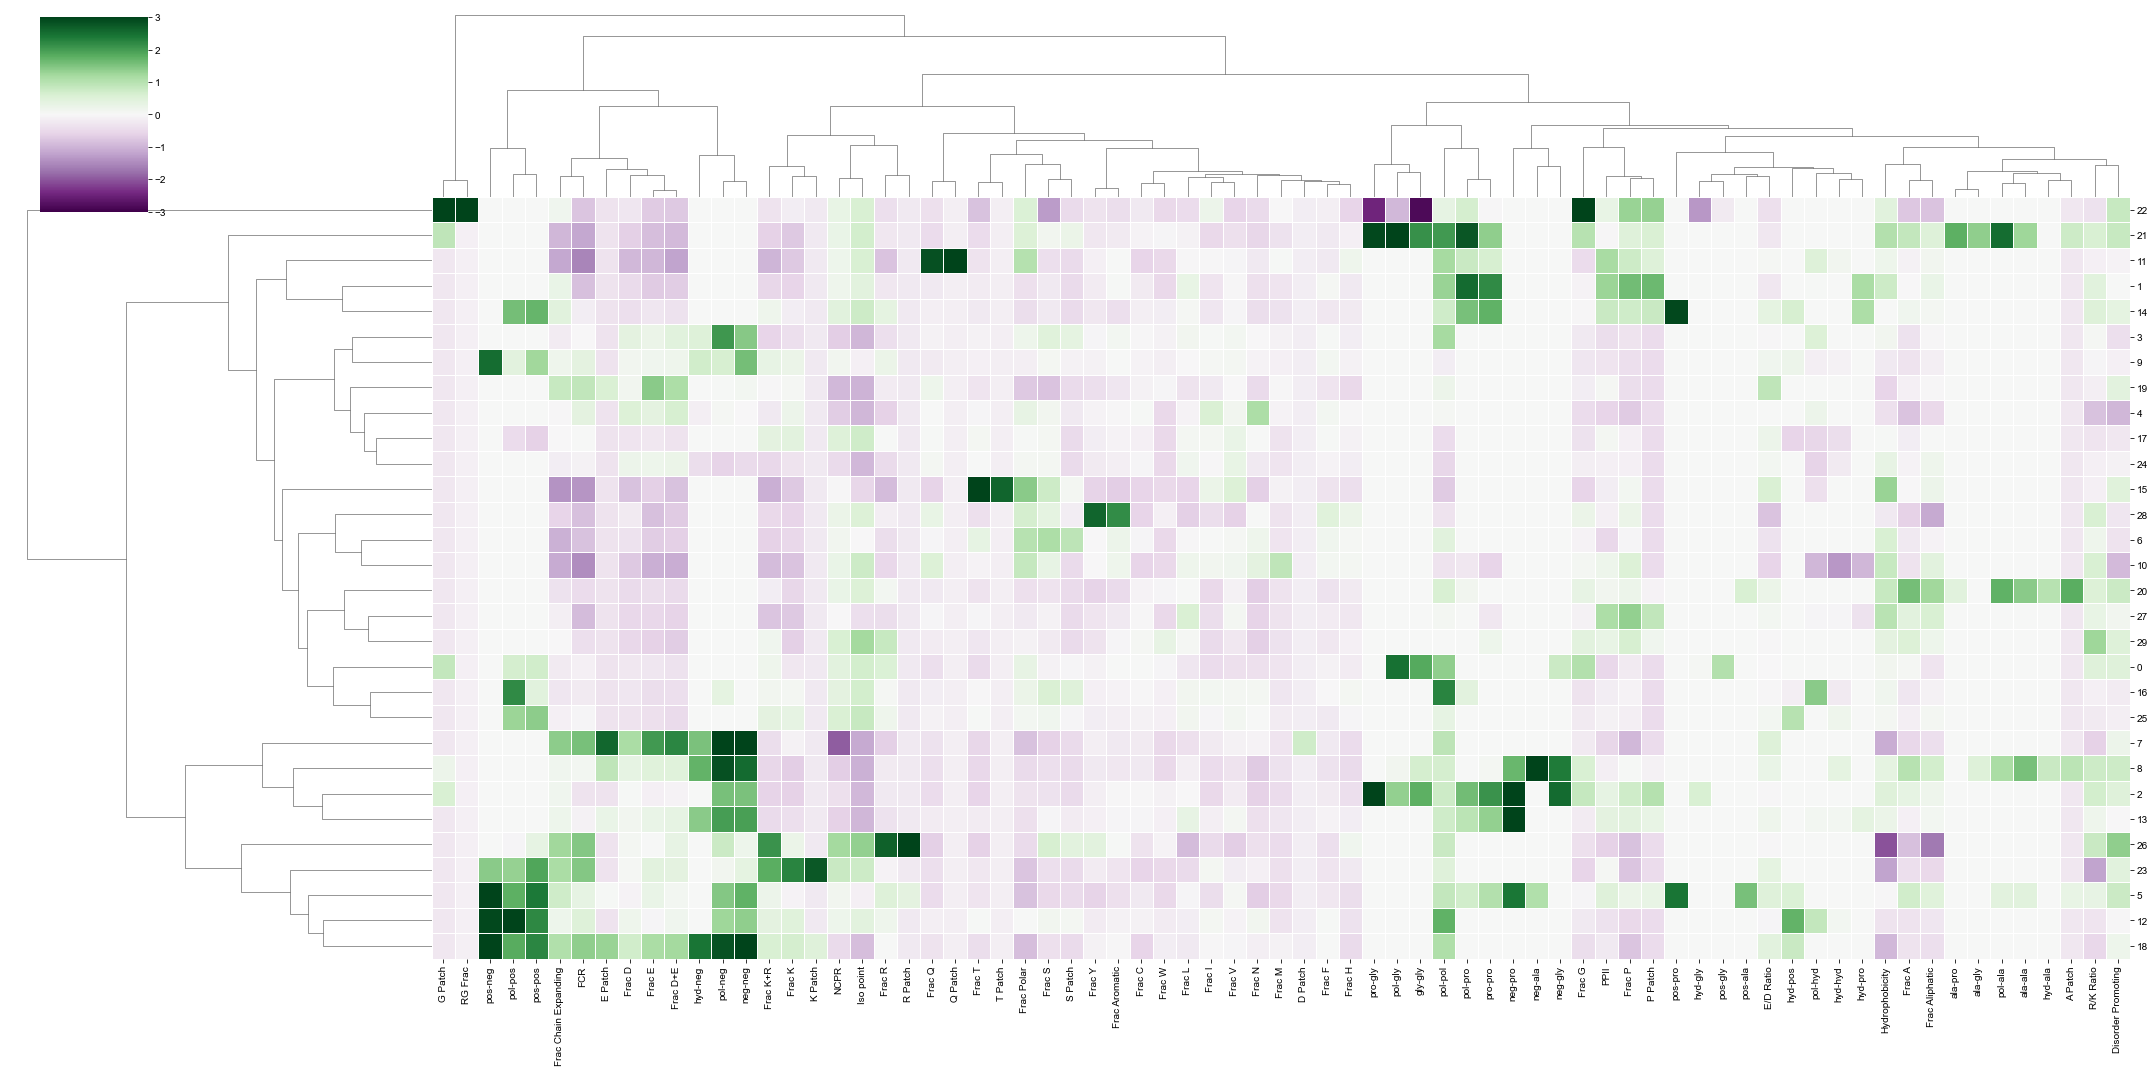

In [9]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.pyplot import gcf


# Extract just nucleolar IDRs
zvecaa_sub=zvecaa[allidx_sub,:]

medvalsbyclust30=np.zeros((numkclusts,len(myfeat)))

for c in range(0,numkclusts):
    print('Cluster_'+str(c))
    currclustpos=[i for i, ltr in enumerate(clusters) if ltr == c]

    for p in range(0,len(myfeat)): 

        czvec=[]
        for idx in currclustpos:
            czvec.append(zvecaa_sub[idx,p])
            
        medvalsbyclust30[c,p]=np.median(czvec)

p = [-3, -0.5, 0.5, 3]
f = lambda x: np.interp(x, p, [0, 0.5, 0.5, 1])

mycmap = LinearSegmentedColormap.from_list('map_white', 
              list(zip(np.linspace(0,1), plt.cm.PRGn(f(np.linspace(min(p), max(p)))))))
        
dfmed = pd.DataFrame(medvalsbyclust30, columns=myfeat)
dfmed = dfmed.loc[:, dfmed.std() > 0.1]
med_clustmap = sbn.clustermap(dfmed, metric="euclidean", method="ward",cmap='PRGn',figsize=(30, 15),vmin=-3,vmax=3,linewidth=0.5) 
#med_clustmap = sbn.clustermap(dfmed, metric="euclidean", method="ward",cmap=mycmap,figsize=(30, 15),vmin=-3,vmax=3,linewidth=0.5) 
plt.setp(med_clustmap.ax_heatmap.get_yticklabels(),rotation=0)
medrowindex=med_clustmap.dendrogram_row.reordered_ind
print(medrowindex)



## 2.4 - Get IDR accessions and sequences for all IDRs

In [10]:
# Get all IDRs of length between 100 - 200
minlength=0
maxlength=100000
allidx_sub=[i for i,v in enumerate(seqlens) if minlength <= v <= maxlength]


genenames=[]
genenamesIDRnum=[]
accs_sub=[]
currseqs=[]
curraccwnum=[]
for i in allidx_sub:
    curracc=fullaccs[i]
    
    # Get gene names with IDR number
    genenamesIDRnum.append(mygenes[i])
    #print(genenamesIDRnum)
    #print(myseqs[i])
    #print(seqlens[i])
    
    # Get gene names
    tmp=mygenes[i].split(' ')
    genenames.append(tmp[0])
    #print(genenames)
    
    # Get accessions
    accs_sub.append(fullaccs[i])
    
    # Get sequences
    currseqs.append(myseqs[i])
    
    # Get accessions with IDR numbers
    curraccwnum.append(fullaccswnums[i])
    
    #with open('IDR_'+str(minlength)+'_'+str(maxlength)+'.fasta', 'a') as f:
    #    f.write('>'+mygenes[i]+'\n')
    #    f.write(myseqs[i]+'\n')

    
print(genenames)
print(genenamesIDRnum)
print(len(genenamesIDRnum))



['KRTAP4-16', 'TULP4', 'TULP4', 'TULP4', 'TULP4', 'TULP4', 'TULP4', 'TULP4', 'PPP4R3B', 'CCDC198', 'CCDC198', 'CCDC198', 'MEPE', 'MEPE', 'MEPE', 'MEPE', 'FAM81A', 'TCEAL5', 'FLG', 'FLG', 'POC1B-GALNT4', 'RASA1', 'SPATS1', 'SPATS1', 'TNRC6B', 'TNRC6B', 'TNRC6B', 'TNRC6B', 'TNRC6B', 'TNRC6B', 'TNRC6B', 'TNRC6B', 'STON2', 'STON2', 'STON2', 'TAF1C', 'TAF1C', 'TAF1C', 'TAF7L', 'TAF7L', 'ING3', 'ING3', 'ING3', 'TTYH3', 'ARHGAP39', 'ARHGAP39', 'ARHGAP39', 'ARHGAP39', 'PABPC1L', 'CDK17', 'CDK17', 'CDK16', 'ANKRD10', 'VIT', 'VIT', 'GPKOW', 'GPKOW', 'GPKOW', 'GPKOW', 'E2F3', 'E2F3', 'SUGP2', 'SUGP2', 'SUGP2', 'SUGP2', 'SUGP2', 'SUGP2', 'SUGP2', 'KSR2', 'KSR2', 'EGLN2', 'EGLN2', 'F5H768', 'FAM166B', 'FAM166B', 'SP5', 'SP5', 'NDUFB9', 'PKP1', 'PBX1', 'PBX1', 'PBX1', 'PBX1', 'PBX2', 'PBX2', 'PBX2', 'PBX3', 'PBX3', 'PBX3', 'ZFYVE16', 'ZFYVE16', 'ZFYVE16', 'ZFYVE16', 'ZFYVE16', 'DDX39B', 'FAT3', 'FAT3', 'ARHGEF26', 'ARHGEF26', 'ARHGEF26', 'SPECC1', 'SPECC1', 'SPECC1', 'SPECC1', 'SPECC1', 'FAM221B', '

## 2.5 - Load in clusters derived from all IDRs from excel file

In [11]:
numkclusts=30

tmpgenelistclust=[]
tmpacclistbyclust=[]
allgenesIDRnum=[]
allaccsIDRnum=[]
allclusters=[]
for c in range(0,numkclusts):
    tmpdf=pd.read_excel('data/Test_clusts_IDR_0_100000_kmeans_30_clusters.xlsx',sheet_name='cluster_'+str(c), engine='openpyxl')

    tmpgenelistclust.append(tmpdf['Genes'].tolist())
    tmpacclistbyclust.append(tmpdf['Uniprot'].tolist())
    
    tmpgenes=tmpdf['Genes'].tolist()
    tmpaccs=tmpdf['Uniprot'].tolist()
    
    #print('Cluster_'+str(c))
    #print(len(tmpgenes))
    
    for g in range(0,len(tmpgenes)):
        if tmpgenes[g][0]=='*':
            allgenesIDRnum.append(tmpgenes[g][1:])
        else:
            allgenesIDRnum.append(tmpgenes[g])
        allaccsIDRnum.append(tmpaccs[g])
        allclusters.append(c)

print(len(allgenesIDRnum))
print(len(genenamesIDRnum))
#print(allclusters)

#pos=[i for i, ltr in enumerate(allgenesIDRnum) if ltr == 'WASHC2A IDR2']
#for p in pos:
#    print(allaccsIDRnum[p])


for element in allgenesIDRnum:
    if element not in genenamesIDRnum:
        print(element)
        
clusters=[]
for g in curraccwnum:
    idx=[i for i, ltr in enumerate(allaccsIDRnum) if ltr == g]
    if len(idx)>1:
        print(g)
        print(idx)
        hi
    clusters.append(allclusters[idx[0]])
    
#print(clusters)
#print(curraccwnum)
#hi

genelistclust=[]
listclust=[]
acclistbyclust=[]
for c in range(0,numkclusts):
    print('Cluster_'+str(c))
    pos=[i for i, ltr in enumerate(clusters) if ltr == c]
    #print(pos)
    print(len(pos))

    acclist=[]
    seqlist=[]
    genelist=[]
    for p in pos: 
        acclist.append(curraccwnum[p])
        seqlist.append(currseqs[p])
        genelist.append(genenamesIDRnum[p])
        genelistclust.append(genenamesIDRnum[p])
        listclust.append(c)
        #print(p)
        #print(curraccwnum[p])
        print(genenamesIDRnum[p])
        print(c)
        print(currseqs[p])

    acclistbyclust.append(acclist)

24508
24508
Cluster_0
1249
FLG IDR2
0
LLEENKIYERSRSSDGKSSSQVNRSRHENTSQVPLQESRTRKRRGSRVSQDRDSEGHSEDSERHSGSASRNHHGSAWEQSRDGSRHPRSHDEDRASHGHSADSSRQSGTRHAETSSRGQTASSHEQARSSPGERHGSGHQQSADSSRHSATGRGQASSAVSDRGHRGSSGSQASDSEGHSENSDTQSVSGHGKAGLRQQSHQESTRGRSGERSGRSGSSLYQVSTHEQPDSAHGRTGTSTGGRQGSHHEQARDSSRHSASQEGQDTIRGHPGSSRGGRQGSHHEQSVNRSGHSGSHHSHTTSQGRSDASHGQSGSRSASRQTRNEEQSGDGTRHSGSRHHEASSQADSSRHSQVGQGQSSGPRTSRNQGSSVSQDSDSQGHSEDSERWSGSASRNHHGSAQEQSRDGSRHPRSHHEDRAGHGHSADSSRKSGTRHTQNSSSGQAASSHEQARSSAGERHGSRHQLQSADSSRHSGTGHGQASSAVRDSGHRGSSGSQATDSEGHSEDSDTQSVSGHGQAGHHQQSHQESARDRSGERSRRSGSFLYQVSTHKQSESSHGWTGPSTGVRQGSHHEQARDNSRHSASQDGQDTIRGHPGSSRRGRQGSHHEQSVDRSGHSGSHHSHTTSQGRSDASRGQSGSRSASRTTRNEEQSRDGSRHSGSRHHEASSHADISRHSQAGQGQSEGSRTSRRQGSSVSQDSDSEGHSEDSERWSGSASRNHRGSAQEQSRHGSRHPRSHHEDRAGHGHSADSSRQSGTPHAETSSGGQAASSHEQARSSPGERHGSRHQQSADSSRHSGIPRRQASSAVRDSGHWGSSGSQASDSEGHSEESDTQSVSGHGQDGPHQQSHQESARDWSGGRSGRSGSFIYQVSTHEQSESAHGRTRTSTGRRQGSHHEQARDSSRHSASQEGQDTIRAHPGSRRGGRQGSHHEQSVDRSGHSGSHHSHTTSQGRSDASHGQS

MEIOSIN IDR2
0
SSPSAYTQEAPQEKDTASKAPKDPPESHSLHRSSVSLD
HSF5 IDR2
0
SEQMGFLISEMGPASKPSEDTGLATPARYREHRSNSQQGKSPDLHLL
HAUS7 IDR1
0
MGGARLGARNMAGQDAGCGRGGDDYSEDEGDSSV
SLC9A4 IDR2
0
AVDEEGESGGESEGKASLVEVRSRWTADHGHGRDHHRSHSPLLQKK
ASXL2 IDR10
0
GYTDCKNATGESSSSKEDDTDEESTGDEQESVTVKEEPQVSQSAGKGDTSSGPHSRETLSTSDCLASKNVKAE
CHD9 IDR10
0
GMGGLLTKPTESGTEDKKGSDSKESEGKTERTESQSSENGGENSVSSSPSTSSTAALNTAAAAN
CHD9 IDR11
0
TLSQSNTFDVQNKNSDLGSSKSVEVKEEDSRIKDQEDKGGTEPSPLNENSTDEGSEKADASSGSDSTSSSSEDSDSSNED
CENPF IDR3
0
QGRNESCDISKEHTSETTERTPKHDVHQIC
EPOR IDR2
0
GISTDYSSGDSQGAQGGLSDGPYSNPYENSLIPAAEPLPPSYVACS
KCNH3 IDR4
0
VDGIEDGCGSDQPKFSFRVGQSGPECSSSPSPGPESGLLTVPHGPSEARN
RIPK2 IDR1
0
IPVNHGPQEESCGSSQLHENSGSPETSRSLPAPQDND
SYTL4 IDR1
0
SGKSALEAESESLDSFTADSDSTSRRDSLDKSGLFPEWKKMSAPKSQVEKETQPGGQ
SCAPER IDR2
0
KVKAHHTGSTASSEITPAQSCPPMTVQKASRKNERKDAEGWETVQRGRPIRSRSTAVMPKVSLATEATRSKDDSDKENVCLLPDESIQKGQFVGDGTSNTIESHPKDSLHSCDH
TNFRSF10D IDR1
0
TIPRQDEVPQQTVAPQQQRRSLKEEECPAGSHRSEYT
ZNF835 IDR1
0
AELEGNWKHEGQVEDLQENQESCPEPEAVA

EKQREKRAACEQLHQQQQQQQEETAAATLLLQGEEEGEED
SYT2 IDR2
1
KKNKKEKGKGMKNAMNMKDMKGGQDDDDAETGLTEGEGEGEEEKEPEN
RBM27 IDR7
1
FSTANQGPKFKDRRLQISWHKPKVPSISTETEEEEVKEEETETSDLFLPDDDDEDEDEYESRSWRR
ACIN1 IDR2
1
LLRQRLEREAREAAELEEASAESEDEMIHPEGVASLLPPDFQSSLERPELELSRHSPRKSSSISEEKGDSDDEKPRKGERRSSRVRQARAAKLSEGSQPAEEEEDQETPSRNLRVRADRNLKTEEEEEEEEEEEEDDEEEEGDDEGQKSREAPILKEFKEEGEEIPRVKPEEMMDERPKTRSQEQEVLERGGRFTRSQEEARKSHLARQQQEKEMKTTSPLEEEEREIKSSQGLKEKSKSPSPPRLTEDRKKASLVALPEQTASEEETPPPLLTKEASSPPPHPQLHSEEEIEPMEGPAPAVLIQLSPPNTDADTRELLVS
FER1L4 IDR2
1
QLGRGSRAGEGTEGAAVEAQPLLGARPEEEKEEEELGTHAQRPEP
FER1L4 IDR3
1
RGHEDPPEEEGEMEETGDMMPKGPQGQKSLDP
H3BUI4 IDR1
1
GEYSEDDVNELVKEDEVDGEEQTQKTQGKKRKAQSIPARKRRQGGLSLEEEEEEDANSESEG
STK4 IDR1
1
VKLKRQESQQREVDQDDEENSEEDEMDSGTMVRAVG
STK4 IDR2
1
TDGANTMIEHDDTLPSQLGTMVINAEDEEEEGTMKRRDETMQPAKPS
RINL IDR1
1
HRGWGREQTPQETEPEAAQRHDPAPRNPAPHGVSWVKGPLSPEVDHPGPALASLLEEEEEDLEGKEEGREDDPEEEGPEDVL
ERICH6 IDR1
1
MAHLRSPSGFGDPGKKDQKESEEELEEEEEEEEVEEEEEEVEEEEEEVEEEEEEVVEEELVGEEQELEAPETFSE
DDX41

EPS8L1 IDR3
2
TPYPGPRLHHSQSPARSLNSTPPPPPAPAPAPPPALARPRWDRPRWDSCDSLNGLDPS
CEP170B IDR2
2
LLHRVGPGDDRHSTKSDLPVHTRTLKGHKHEDGTQSDSEDPLAKAASAAGVPLEASGEQVRLQRQIKRDPQELLHNQQAFVIEFFDEDTPRKKRSQSFTHSPSGDPKADKRRGPTPADRDRPSVPAPVQAGGRSSGPQRAGSLKREKTEERLGSPSPASRTPARPFGSVGRRSRLAQDFMAQCLRESSPAARPSPEKVPPVLPAPLTPHGTSPVGPPTPPPAPTDPQLTKARKQEEDDSLSDAGTYTIETEAQDTEVEEARK
TRIM37 IDR2
2
LWGLQPRPPASLLQPTASYSRKDKDQRKQQAMW
AP2A2 IDR1
2
SSILAKLKKKKGPSTVTDLEDTKRDRSVDVNGGPEPAPASTSAVSTPSPSADLLGLGAAPPAPAGPPPSSGGSG
INSYN2B IDR3
2
LQSLEEAEPVEEASPPPKSPAEPPAPEKQDLRRKTKKVKKKCFWWI
DENND3 IDR1
2
MRSLRKKREKPRPEQWKGLPGPPRAPEPEDVA
CDK13 IDR1
2
MPSSSDTALGGGGGLSWAEKKLEERRKRRRFLSPQQPPLLLPLLQPQLLQPPPPPPPLLFLAAP
SORCS1 IDR3
2
ALPSPPSPSTQPGDSSLRLQRARHATPPSTPKRGSAGAQYAI
SYNPO2 IDR4
2
RRERMDQITAQKEEDKVGGTPSREQDAAQTDGLRTTTSYQRKEEESVRTQSSVSKSYIEVSHGLGHVPQQNGFSGTSETANIQRMVPMNRTAKPFPGSVNQPATPFSPTRNMTSPIADFPAPPPYSAVTPPPDAFSRGVSSPIAGPAQPPPWPQPAPWSQPAFYDSSERIASRDERISVPAKRTGILQEAKRRSTTKPMFTFKEPKVSPNPELLSLLQNSEGKRGTGAGGDSGPEEDYLSLGAEACNFMQSSSAK

2
QKRRGGARARPEPVLDNPPPRPIRVLPRGPQGP
PITPNM3 IDR3
2
AQPEFLRKRNHLRRTMSVQQPDPPAANPKPERAQSQPESDKDHERPLPALSWARGPPKFESVP
ZDBF2 IDR10
2
AEELSSAMANPPPKRPVRASCRVARRRKKTDESYHGRQKGPSTPVRAYDLRSSS
MNT IDR1
2
EWQAQQQQRAREEQERLRLEQEREQEQKKANSLARLAHTLPVEEPRMEAPPLPLSPPAPPPAPPPPLATPAPLTVIPIPVVTNSPQPLPPPPPLPAAAQPLPLAPRQPALVGAPGLSIKEPAPLPSRPQVPTPAPLLPDSKATIPPNGSPKPLQPLPTPVLTIAPHPGVQPQLAPQQPPPPTLGTLKLAPAEEVKSSEQKKRPGGIGTREVHNKLEKN
MCM10 IDR4
2
QQKQRMLEMRRRKSEEIQKRFLQSSSEVESPAVPSSSRQPPAQPPRTGSEFPRLEGAPATMTPKLGRG
FAM90A7 IDR1
2
MMARRDPKSWAKRLVRAQTLQKQRRAPVGPRSPPPDEEDPRLKCKN
DHX30 IDR1
2
MFSLDSFRKDRAQHRQRQCKLPPPRLPPMCVNPTPGGT
XYLT2 IDR1
2
EDEAGEKGRQRKPRPLDPGEGSKDTDSSAGRRGSTGRRHGRWRGRAESPGVPVAKVVRAVTSRQRASRRVPPAPPPEAPGRQNLSGAAAGEALVGAAGFPPHGDTGSVEGAPQPTDNGFT
IGSF9 IDR1
2
AARRRRKRLRQDPPLIFSPTGKSAAPSALGSGSPDSVAKLKLQGSPVPSLRQSLLWGDPAGTPSPHPDPPSSRGPLPLEPICRGPDGRFVMGPTVAAPQERSGREQAEPRTPAQRLARSFDCSSSSPSGAPQPLCIEDISPVAPPPAAPPSPLPG
DTX2 IDR3
2
LSRAPQPTSPPASRLASKSHGSVKRLRKMSVKGATPKPEPEPEQVIKN
B3GAT2 IDR1
2
ARLPLRRGGPAH

4
VANQPGMQPQPGLQSQPGMQPQPGMHQQPSLQNLNAMQAGVPRPGVPPQQQAMGGLNPQGQALNIMNPGHNPNMASMNPQYREMLRRQLLQQQQQQQQQQQQQQQQQQGSAGMAGGMAGHGQFQQPQGPGGYPPAMQQQQRMQQHLPLQGSSMGQMAAQMGQLGQMGQPGLGADSTPNIQQALQQRILQQQQMKQQIGSPGQPNPMSPQQHMLSGQPQASHLPGQQIATSLSNQVRSPAPVQSPRPQSQPPHSSPSPRIQPQPSPHHVSPQTGSPHPGLAVTMASSIDQGHLGNPEQSAMLPQLNTPSRSALSSELSLVGDTTGDTLEKFVEGL
AMOTL1 IDR1
4
AIQHQATGSAGPAHPTNNFSSTENLTQEDPQMVYQSARQEPQGQEHQVDNTVMEKQVRSTQPQQNNEELPTYEEAKAQSQFFRGQQQQQQQQGAVGHGYYMAGGTSQKSRTEGRPTVNRANSGQAHKDEALKELKQ
CITED2 IDR1
4
MADHMMAMNHGRFPDGTNGLHHHPAHRMGMGQFPSPHHHQQQQPQHAFNALMG
TCF20 IDR1
4
MQSFREQSSYHGNQQSYPQEVHGSSRLEEFSPRQAQMFQNFGGTGGSSGSSGSGSGGGRRGAAAAAAAMASETSGHQGYQGFRKEAGDFYYMAGNKDPVTTGTPQPPQRRPSGPVQSYGPPQGSSFGNQYGSEGHVGQFQAQHSGLGGVSHYQQDYTGPFSPGSAQYQQQASSQQQQQQVQQLRQQLYQSHQPLPQATGQPASSSSHLQPMQRPSTLPSSAAGYQLRVGQFGQHYQSSASSSSSSSFPSPQRFSQSGQSYDGSYNVNAGSQYEGHNVGSNAQAYGTQSNYSYQPQSMKNFEQAKIPQGTQQGQQQQQPQQQQHPSQHVMQYTNAATKLPLQSQVGQYNQPEVPVRSPMQFHQNFSPISNPSPAASVVQSPSCSSTPSPLMQTGENLQCGQGSVPM
ISL1 IDR2
4
QLQQQQPNDKTNI

5
RISSATASGQKPTTLPQKVVPPPSSCASLVPKPPPNHEQVLRRATSQKASKGSSAEGQLNGLQSSLNPAAFVPITSSTDPAHTKI
SLC4A7 IDR3
5
HSDPHLLERNGEGLSASRHSLRTGLSASNLSL
TBX15 IDR3
5
DSGYNRLQSGTTSATQPSETFMPQRTPSLISGIPTPPSLPGNSKMEAY
INO80 IDR5
5
SSPLQTSLVRPAGLADFGPSSASSPLSSPLSKGNNVPGNPKNLHMTSSLAPDSLVRKQGKGTNPSGGR
UTS2R IDR1
5
MALTPESPSSFPGLAATGSSVPEPPGGPNATLNSSWASPTEPS
ADGRD1 IDR1
5
TSSSARTSNAKPFHSDLMNGTRPGMASTKLSPWDKSSHSAHRVDLSAV
DERPC IDR2
5
LGGNLTPFPRNPSPFPASSGSLASNPAPFPAGARDPSMASFPRGMNPTGTGAVSFPRPGGLLGPGPGPGPTLNPRTGALPGPGPLSNPRLGGLPGPGPMSNPRAGGLLGAGPDPRGGGPMGPGSGPNLRAGVLLTSGNGPPNPRPVGLGPGPNPNLRSGFLGTNPAPRSGVFPGPGLGPNPRPSGLGPGPNLDARAGG
DERPC IDR3
5
SFSQASGNMGTSPSSMARVPGPMGPNSGPSSRGIGLPGPNPSPMSRAPGPIGPNSAHFSRPVGPMGVNANPFPRGAGSSAFSQSSGTLASNPATFQRSAGLQGSNPTIFPRASGPLGPNPANFPRATGLQGPSPTTFPRSTGPLGPGQVTFPRPAAGHLGPSPAGPVGINPAPFTRPTGTLGLNPASFPRMNGPAGKSFVPFPRVGSLPGTNPAAFPRPGGPMAAMYPNGMLPP
MAML1 IDR2
5
NRSVPDEDMKDLFNEDFEEKKDPESSGSATQTPLAQDINIKTEFSPAAFEQEQLGSPQVRAGSAGQTFLGPSSAPVSTDSPSLGGSQTLFHTSGQPRADNPSPNLMPASAQAQNAQRALAGVVLPSQG

LQTSERANKLAAPSVSHVSPRKNPSVVIKP
COBLL1 IDR7
5
HYVTSAAAKSVHAAPNPAPKELTNKEAERDMLPSPEQTLSPLSKMPHSVPQPLVEKTDDDVIGQAPAEASPPPIAPKPVTIPASQVSTQNLKTLKTFGAPRPYSSSGPSPFALAVVKRSQSFSKERTESPSASALVQPPANTEEGKTHSVNKFVDIPQLGVSDKENNSAHNEQNSQIPTPTDGPSFTVMRQSSLTFQSSDPEQMRQSLLT
HCFC1 IDR3
5
SPSIKDLPAGRHSHAVSTAAMTRSSVGAGEPRMA
TOGARAM2 IDR1
5
AGPRVLPPGSINSSLPHGEGSLQPEPRALLNNEEPSQL
TOGARAM2 IDR2
5
LKKRRLSEGLAASSRASLDPGGGPQGVPLHSTIPRATSQRLLRVPRPMPLIQSIPTTPEASGVKEKGLDLPGSIPGPHELRPG
TMF1 IDR1
5
ISSPVSGGWDTSTWGLKSNTEPQSPPIASPKAITKPVRRT
MYOCD IDR3
5
LGMHQAQLKEPNEQMVRNPNSSSTPLSNTPLSPVKNSFSGQTGVSSFKPGPLPP
MYOCD IDR4
5
SPQCSPQHSPLGAVKSPQHISLPPSPNNPHFLPSSSGAQGEGHRVSSPISSQVCTAQM
DTX4 IDR1
5
TGPLQLPVTRKNMPPPGVVKLPPLPGSGAKPLDSTGTIRGPLKTAPSQVIRRQASSMPTGTTMGSPASPPGPNSKTGRVALA
WIZ IDR4
5
VNKAIKSPPGFSAKGLGHPPSSPLLKKTPLALAGSPTPKNPEDKSPQLSLSPRPASPKAQWPQSEDEGPLNLTSGPE
WIZ IDR6
5
SKPCLIKKEPPAGDLAPALAEDGPPTVAPGPVQSPLPLSPLAGRPGKPGAGPAQVPRELSLTPITGAKPSATG
MEF2A IDR1
5
TSPNALSYTNPGSSLVSPSLAASSTLTDSSMLSPPQTTLHRNVSPGAPQRPPSTGNAGGMLSTTDL

HNRNPCL2 IDR2
6
SLLENLEKIEKEQSKQEVEVKNAKSEEEQSSSSMKKDETHVKMESEGGAEDSAEEGDPLDDDDNEDQGDNQLHLIKNNEKDAEEGEDNRDSTNGQDDS
KCNC1 IDR1
6
DSFGGAPLDNSADDADADGPGDSGDGEDELEMTKRLALSDSPDGRPG
UBR4 IDR4
6
RNKRRHVTLPSSPRSNTPMGDKDDDDDDDADEKMQSSGIPNGGHIRQESQEQSEVDHGDFEMVSESMVLETAENVNNGNPSPL
ZDHHC15 IDR1
6
SPGDGHSFPMRSMNESQNPLLANEETWEDNEDDNQDYPEGSSSLAVETET
POLQ IDR3
6
ALELSDPVLDEHHQGDQDGGDQDERAEKSKLTGTRQN
STRN3 IDR2
6
GLSNSEPNGSVETKNLEQILNGGESPKQKGQEIKRSSGDVLETFNFLENADDSDEDEENDMIEGIPEGKDKHRMNKHKIGNEGLAADLTDDPD
NEK10 IDR2
6
ILSDDNFNLENAEKDTYSEVDDELDISDNSSSSSSSPLKESTF
CHD9 IDR7
6
EQRANDYMDGDVEDPEYKPAPAIFKDDIEDD
PGBD2 IDR1
6
AMEEEESNNNREEIFIAPPDNAAGEFTDEDSGDEDSQRGAHLPGSVLHASVLCED
DBR1 IDR1
6
EEHHVCGEYEEQDDVESNDSGEDQSEYNTDTSALSSINPDEIMLDEEEDEDSIVSAHSGMNTPSVEPSDQASEFSASF
TFDP3 IDR2
6
ATSSGGSQYSGSRVETPAVEEEEEEDNNDDDLSENDEDD
KLC1 IDR1
6
MNQLKKYDDDISPSEDKDTDSTKEPLDDLFPNDEDDPGQGIQQQHSSAAAAAQQ
ADNP IDR3
6
FPLLKKRKLDDDSDSPSFFEEKPEEPVVLALDPKGHED
PSMD3 IDR2
6
PPKSYNKDLESAEERREREQQDLEFAKEMAEDDDDSFP
WDR44 IDR4
6
TEGRVSPS

HIVEP2 IDR5
7
PLIRSNSVPTSSATNLTIPPSLRGSHSFDERMTGSDDVFYP
C4orf51 IDR1
7
GRCDSESKVCSSEDSEADRYSDYGWGGPSSPFN
TP63 IDR1
7
QQIQNGSSSTSPYNTDHAQNSVTAPSPYAQPSSTFDALSPSPAIPSNTDYPGPHSFDVS
NDFIP1 IDR1
7
AVEPACGSRYQQLQNEEESGEPEQAAGDAPPPYSSISAESAAYFDYKDESGF
USP54 IDR2
7
TQLSPFSEDSAKEFIPDEPSKPPSYDIKFGGPSPQYKRWGPARPGSHLLEQHPRLIQRMESGYESSERNSSSPVSLDAALPESSNVYRDPSAKRSAGLVPSWRHIPKSHSSSILEVDSTASMGGWTKSQPFSGEEISSKSELDELQEEVARRAQEQELRRKREKELEAAKGFNPHPSRFMDLDELQNQGRSDGFERSLQ
USP54 IDR6
7
FQRMQGVSMRDSTGFKDRSLSGSLRKNSSPSDSKPPFSQGQEKGHWPWAKQQSSLEGGDRPLSWEESTEHSSLALNSGLPNGETSSGGQPRLAEPDIYQEKLSQVRDVRSKDLGSST
HRG IDR2
7
EANFPSFPLPHHKHPLKPDNQPFPQSVSESC
TDRD3 IDR2
7
LTSNKQKPVMGPPLRGRGKGRGRIRSEDEEDLGNARPSAPSTLFDFLESKMGTLNVEEPKSQPQQLHQGQYRSSNTEQNGVKDNNHLRHPPRNDTRQPRNEKPPRFQRDSQNSKSVLEGSGLPRNRGSERPSTSSVSEVWAEDRIKCDRPYSRYDRTKDTSYPLGSQHSDGAFKKRDNSMQSRSGKGPSFAEAKENPLPQGSVDYNNQKRGKRESQTSIPDYFY
TDRD3 IDR3
7
EGTYDQTLEFRRGGDGQPRRSTRPTQQFYQPPRARN
GNAS IDR2
7
LMEPGAFSGARPGLGGYSPPPEEAMPFEFDQPAQRG
APLF IDR2
7
SHPGDSDYGGVQIVGQDETD

7
IRKNWNSSVPRSSDFEDSAHLMQPVHNKPVKQGPRYNLHQIQGHSAPRHFHTQTQSLQQSVRKFSENPHVYQRHHLPPPGPPGEDYSHRR
SYNGR2 IDR1
7
YASYPGASVDNYQQPPFTQNAETTEGYQPPPVY
BAG4 IDR2
7
SRAPYPSTYPVRPELQGQSLNSYTNGAYGPTYPPGPGANTASYSG
BAG4 IDR3
7
YSTEVPSTYRSSGNSPTPVSRWIYPQQDCQTEAPPLRGQVPGYPPSQNPGMTLPHYPYGDGNRSVPQSGPTVRPQEDAWASPGAYGMGGRYPWPSSAPSAPPGNLYMTESTSPWPSSGSPQSPPSPPVQQPKDSSYPYSQSDQSMNRHNFPCSVHQYESSGTVNNDDSDLLDSQVQYSAEPQLYGNATSDHPNNQDQSSSLPEECVPSDESTPP
LBR IDR2
7
PFGNSISRYNGEPEHIERNDAPHKNTQEKFSLS
MAGED1 IDR2
7
AAARPKSAFKVQNATTKGPNGVYDFSQAHNAKDVPNTQPKAAFKSQNATPKGPNAAYDFS
MYOF IDR2
7
QNESRYPGGDWKPAEDTYTDANGDKAASPSELT
GAREM2 IDR3
7
LFLTQGRLEGPPASPRDGATGFGVRDASSWQ
ADGRV1 IDR1
7
WERASFQQGSQASPDLKPSPQNGATFPSSGGYGQGSLIADE
ADAMTS9 IDR2
7
DQDCSMSPCPQRTPDSGLAQHPFQNEDYRPRSASPSRTHVLGGNQWR
SPATA21 IDR4
7
LDPDIRSPFFQSGSQGNREHNSDSRKWLSSVPARTH
TPX2 IDR2
7
DFHFRTDERIKQHPKNQEEYKEVNFTSELRKHPSSPARVTKG
RIPK3 IDR1
7
SNRRFSIPESGQGGTEMDGFRRTIENQHSRND
RIPK3 IDR3
7
TWGLAPSGKGRGLQHPPPVGSQEGPKDPEAWSRPQGWYNHSGK
MAP4K3 IDR1
7
PHRIHSTSRNVREEKTRSE

8
SSLHQSVPNNGSERRSTSFPLSGPPRKPQESRGHVSPAEDQTIQAPPVSVSALARDSPLTPNEMSSSTLTSPIEASWVSSQNDSPGDASEGPEYLAIGNLDPRGRTASCQSHSSNAESSSSNLFSSSSSQKPDSAASSLGDQEGGGESQLSSVLRRSSFSEGQTLTVTSGAKKSHIRSHSDTSIASRGAPESCNDKAKLRGPLPYSGQSSEVSTPS
FAF1 IDR1
8
EYGGETIPGPAFNPASHPASAPTSSSSSAFRPVMPSR
CNTRL IDR1
8
MKKGSQQKIFSKAKIPSSSHSPIPSSMSNMRSRSLS
CNTRL IDR4
8
GELVTSTSADSASSPSLSQLESSLTEDSQLGQNQEKNASAR
NAV3 IDR4
8
LFGAKAGGKSASAPNTEGVKSSSVMPSPSTTLARQGSLESPSSGTGSMGSAGGLSGSSSPLFN
NAV3 IDR5
8
SLLMRTGSVRSTLSESMQLDRNTLPKKGLRYTPSSRQANQEEGKEWLRSHSTGGLQDTGNQSPLVSPSAMSSSA
NRG2 IDR3
8
NVPATDHVIRRETETTFSGSHSCSPSHHCSTATPTSSHRHESHTWSLERSESLTSDSQSGI
NAV2 IDR5
8
KNSVVISNPHATMTQQGNLDSPSGSGVLSSGSSSPLYSKNVDLNQSPLASSPSSAHSAPSNSLTWGTNASSSSAVSKDGL
NAV2 IDR6
8
DISLSSGGVPSHNSSTGLIASSKDDSLTPFVRTNSVKTTLSESPLSSPAASPKFCRSTLPRKQDSDPHLDRNTLPKKGLRYTPTSQLRTQEDAKEWLRSHSAGGLQDTAANSPFSSGSSVTSPS
NAV2 IDR9
8
SFKQAFGKKKSPKSASSHSDIEEMTDSSLPSSPKLPHNGSTGSTPLLRNSHSNSLISECM
NAV2 IDR10
8
QSEIEKLKAENDRLKSESQGSGCSRAPSQVSISASPRQSMGLSQHSLN
SPHKAP IDR3
8
TIRRRETEPS

SEC14L5 IDR2
8
MSSLESCTSGFSQLSAATSSSSSGQSHSSSLVSR
FGFR3 IDR2
8
SAPFEQYSPGGQDTPSSSSSGDDSVFAHDLLPPAPPSSGGSRT
FZD3 IDR1
8
PDFAQSLLRDPNTPIIRKSRGTSTQGTSTHASSTQLAMVDDQRSKAGSIHSKVSSYHGSLHRSRDGRYTPCSYRGMEERLPHGSMSRLTDHSRHSSSHRLNEQSRHSSIRDLSNNPMTHITHGTSMNRVIEEDGTSA
DCLRE1C IDR2
8
SLENFPSSTVAGGSQSPKLFSDSDGESTHISSQNSSQSTHITEQGSQGWDSQSDTVLLSSQERNSGDITSLDKADYRP
Cluster_9
1341
TULP4 IDR1
9
KKSPKISRASKSPKLPRISIEARKSPKLPRAAQELSRSPRLPLRKPSVGS
CCDC198 IDR1
9
LSQREARTMHKAKQVLEKKMQTPMYTSENR
CCDC198 IDR2
9
QMELKKSLHGEARINKQSPRDHKAKKTLQSTPRNDDHDLLTMLPDEILNRGPGNSKNT
POC1B-GALNT4 IDR1
9
DLSPNGKQLGAGRARELGSRRLSDLQKNTEDLSRPLYKKPPADSRA
GPKOW IDR4
9
DKNTLDLRQQNGTASSRKTLWNQELYIQQDNSERKRKHLPDRQDGPAAKSEKAAPRSQ
SPECC1 IDR1
9
MRSAAKPWNPAIRAGGHGPDRVRPLPAASSGMKSSKSSTSLAFESRLSRLKRASSEDTLNKPGSTAASGVVRLKKTATAGAISELTESRLRSGTGAFTTTKRTGIPAPREFSVTVSRERSVPRGPSNPRKSVSSPTSSNTPTPTKHLRTPSTKPKQENEGGEKAALESQVRELLAEAKAKDSEINRLRSELKKYKEKRTLNAEGTDALGPNVDGTSVSPGDTEPM
ANKRD20A3P IDR1
9
VDSLPASDDKDLNVATKQCVPEKVSEPLPGSSHEKGNRIVNGQGEGPPAKHPS

9
VMEETKEWKSEEELHRRKSSRRHSLNQQTKALQYLRRHSLDVQAKGQKSSKRHSLDQQSKGWQSPKQKSLDQQIKDWLSPKRHSVDKQAQLNQTKEQLPDQQAEDQQAKGEQYPEGQSKDGQVKDQQTDKEQNSKKQTQDQQTEDQPAQEKKSPKGQFQNVQAEGQQAQVEKVPKL
TET1 IDR1
9
MSRSRHARPSRLVRKEDVNKKKKNSQLRKTTKGANKNVASVKTLSPGKLKQLIQERDVKKKTEPKPPVPVRSLL
TET1 IDR2
9
EVIKENKRPQREKKPKVLKADFDNKPVNGPKSESMDYSRCGHGEEQKLELNPHTVENVTKNEDSMTGIEVEKWTQNKKSQLTDHVKGDFSANVPEAEKSKNSEVDKKRTKS
TET1 IDR5
9
NQEKGTIQQKPPSSVHNNHGSSLTKQKNPTQKKTKSTPSRDRRKKKPTVVSYQENDR
KNOP1 IDR3
9
KKGNMDEAHIDQVRRKALQEEIDRESGKTEASETRKWTGTQFGQ
ZNF750 IDR1
9
DRVPKCPKSNSLDPKQTNQPDATAKPASSKSVANGLSAFDSKLQHSSAREDIKENLELQAR
TCEAL7 IDR1
9
MQKPCKENEGKPKCSVPKREEKRPYGEFERQQTEGNF
PPIP5K2 IDR3
9
ASPSSDVPRKTAEISSTALRSSPIMRKKVSLNTYTPAKILPTPPATLKSTKASSKPATSGPSSAVVPNTSSRKKNITSKTETHEHKKNTGKKK
ATMIN IDR2
9
RTGHEIPAEHRDPPSKKRKMENCAQNQKLSNKTIESLNNQPIPRPDTQELEASE
CTIF IDR2
9
EIAHTKKLFRRRRNDRRRQQRPPGGNKPQQHGDHQPGSAKHNRDHQKSYQGGSAPHPSGRPTHHGYSQNRRWHHGNMKHPPGDKGEAGAHRNAKETMTIENPKLEDTAGDTGHSSLEAPRSPDTLAPVASERLPPQQSGGPEVETKRKDSILPERIGERPKITLL

RGS22 IDR2
9
QIPEIQKEEFSLSQPPKSPNKSPEVKTATQKPWKREL
FSIP1 IDR2
9
PTISSFSPRLENRNNQKPDRDGERNMEVTPGEKILRNTKEQRD
LCOR IDR2
9
GQFDHSKDGWLGPGPMPAVHKAANGHSRTKMISTSIKTARKSKRASG
GIGYF2 IDR5
9
VKEVGPRNSTNKNKNNASLSKSVGVSNRQNK
RIF1 IDR1
9
EESSGPYSDGTENSQLNVKISGMERKSNGKRDSFLAQTKNKKENMKPAAK
RIF1 IDR5
9
CQHKRSRRVRRSKGCDCCGEKSQPQEKSLIGLKNTENNDVEISETKKADVQAPVSPSETSQANPYSEGQFL
ZC2HC1C IDR6
9
RMRGSKRKVFDSSRARAKGTELEQYLNWKGPASAKAEPPQKSNWR
ETV4 IDR2
9
FHSPTTRIKKEPQSPRTDPALSCSRKPPLP
IQCJ-SCHIP1 IDR2
9
QFREQEVRNQGQARTNSTSAQKNERESIRQK
C2CD2L IDR1
9
HYEEGSPRNLGTPTSSTPRPSITPTKKIELDRTI
LMO7 IDR2
9
KSQLKEQDQKWQDDLAKWKDRRKSYTSDLQKKKEEREEIEKQALEKSKRSSKTFKEMLQDRESQNQKSTVPSRRRMYSFDDVLEEGKRPPTMTVSEASYQSERVEEKGATYPSEIPKEDSTTFAKREDRVTTEIQLPSQSPVEEQSPASLSSLRSRSTQMESTRVSASLPRSYRKTDTVRLTSVVTPRPFGSQTRGISSLPRSY
PACRGL IDR1
9
MQKSEGSGGTQLKNRATGNYDQRTSSSTQLKHRNAVQGSKSSLSTSSPESARKLHPRPSDKLNPKTINPFG
CPLANE1 IDR1
9
HMELTSIHKPTDKRKMCNQKENPTKKEDHEKL
FMN1 IDR6
9
VSKLTSEKKVETKKINPTASLKERLRQKEASVTTN
BMPR2 IDR4
9
LPKQQNLPKRPTSLPLNTKNSTK

PIK3C2B IDR3
11
GSDGGVSSSPGPGDIEGSCKKLSPPPLPPRASIWDTPPLPPRKGSPSSSKISQPSDINT
LRFN4 IDR2
11
GRLPLKLSHVQSQTNGGPSPTPKAHPPRSPPPRPQRSCSLDLGDA
VAMP2 IDR1
11
MSATAATAPPAAPAGEGGPPAPPPNLTSNRRLQQTQ
DMRTA1 IDR1
11
MERSQCGSRDRGVSGRPHLAPGLVVAAPPPP
BTBD1 IDR1
11
MASLGPAAAGEQASGAEAEPGPAGPPPPPSPSSLGPLL
MARCHF11 IDR1
11
MSFEGGHGGSRCRGAESGDAEPPPQPPPPPPPTPPPGEPAPVPAAPRYLPPLPASPETPERAAGPSEPLGEVAPRCRGADELPPPPLPLQPAGQEVAAAGDSGEGPRRLPEAAAAKGGPGESEAGAGGERERRGAGDQPETRSVCSSRSSSSGGGDQRAGHQHQHH
HOXA3 IDR1
11
PYPASAALGADGEYHRPACSLQSPSSAGGHPKAHELSEACLRTLSAPPSQPPSLGEPPLHPPPPQAAPPAPQPPQPAPQPPAPTPAAPPPPSSASPPQNASNNPTPANAAKSPLLNSPTVAKQIFPWMKESRQNTKQKTSSSSSGESCAGDKSPPGQASSKRARTAYTS
HOXA3 IDR2
11
MKYKKDQKGKGMLTSSGGQSPSRSPVPPGAGGYLNSMHSLVNSVPYEPQSPPPFSKPPQGTYGLPPASYPASLPSCAPPPPPQKRYTAAGAGAGGTPDYDPHAHGLQGNGSYG
DYRK1B IDR1
11
RRTADEATNTGPAGSSASTSPAPLDTCPSSSTASSISSSGGSSGSSSDNRTYRYSNRYCGGPGPPITDCEMNSPQVPPSQPLRPWAGGDVPHKTHQAPASASSLPGTGAQLPPQPRYLGRPPSPTSPPPPELMDVSLVGGPADCSPPHPAPAPQHPAASALRTRMTGGRPPLPPPDDPATLGPHLGLRGVPQSTAASS
ZNF

ZBTB3 IDR2
12
SLEPLPSLDVGPESLRVVEPKDPGGPLQGFYPPASAPTSAPAPVSAPVPSQAPAP
ZBTB3 IDR3
12
VISDEETDVSDEQPQGPERAFPSGGAVYGAQPSQPEAFEDPGAAGLEEVGPSDHF
NIBAN1 IDR2
12
TLSNEVFQESEEEKQPEVPSSLAKGESLSLPGPSPPPDGTEQVIISRVDDPVVNPVATEDTAGLPGTCSSELEFGGTLEDEEPAQEEPEPITASGSLK
SH2D3C IDR1
12
RRSSASISRQSHLEPDTFEATQDDMVTVPKSPPAYARSSDMYSHMGTMPRPSIKKAQNSQAARQAQEAGPKPNLVPGGVPDPPGLEAAKEVMVKATGPLEDTPAMEPNPSAVEVDPIRKPEVPTGDVEEERPPRDVHSERAAGEPEAGSD
PLEKHG7 IDR2
12
TSEPERALNAADSLEPQTRPTDKYLPPELQPVNEGSLHQASLRQQEGHFLPSPTLRHPSPQGEELH
LRRC75A IDR1
12
GHLPTILELGEGPGSGEEVREGTVGQEDPGGGPVAPAEDHHEGKETVAAAQT
PDE2A IDR2
12
LQQRGPREAPRAVQNPPEGTAEDQKGGAAYT
ZNF536 IDR1
12
MEEASLCLGVSSAEPEAEPHLSGPVLNGQYAMSQ
AIRE IDR3
12
QEVQPRAEEPRPQEPPVETPLPPGLRSAGEEVRGPPGEPLAGMDTTLV
SIX5 IDR3
12
LGPLLLTGGGGAPPPQPSPQGASETKTSLVLDPQTGEVRLEEAQSEAPETKGAQVAAPGPALG
DMPK IDR1
12
EGATAVTGVPSPRATDPPSHLDGPPAVAVG
ERBB2 IDR1
12
FCPDPAPGAGGMVHHRHRSSSTRSGGGDLTLGLEPSEEEAPRSPLAPSEGAGSDVFDGDLGMGAAKGLQSLPTHDPSPLQRYSEDPTVPLPSETDGYVAPLTCSPQPEYVNQPDVRPQPPSPREGPLPAARPAGA

12
NLASSPSMSLASPQPCGLASHEEHRGAAEELASTPNDKASSPGHPAFLEDGSPSP
KTI12 IDR1
12
GPQVAGANENPGRNVSVSWRPRAEEDGRAQAAGSSVL
KTI12 IDR2
12
ADSVVNGSAQADVPKELEREESGAAESPALVTPDSEKSAKHGSGA
C2orf27A IDR1
12
MTVKWKQLSAPASGAEIQRFPVPAVEPVPAPGADSPPGTALELEEAPEPSCRCPGTAQDQPSEELPDFMAPPVE
RIOX1 IDR2
12
AALRTQTLPSENSEESRVESTADDLGDALPGGAA
IRF7 IDR2
12
YGWAVETTPSPGPQPAALTTGEAAAPESPHQAEPYLSPSPSACT
SMTN IDR1
12
ATLAGRLYSGRPNSGSREDSKGLAAHRLEQCEVPEREEQEQQAEVSKPTPTPEGTSQDVTTVTLLLRAPPGSTSSSPASPSSSPTPASPEPPLEPAEAQCLTAEVPGSPEPPPSPPKTTSPEPQESPTLPSTEGQVVNKLLSGPKETPAAQSPTRGPSDTKRADVAGPRPCQRSLSVLSPRQPAQNRESTPLASGPSSFQRAGSVRDRVHKFTSDSPMAARLQDGTPQAALSPLTPARLLGPSLTSTTPASSSSGSSSRGPSDTSSRFSKEQRGVAQPLAQLRSCPQEEGPRGRGLAARPLENRAGGPVARSEEPGAPLPVAVGTAEPGGSMKT
GGN IDR1
12
MGNLQSEPSAGGGSRKVQPSDRAPDSRRTSLVEPEMTSQAM
TMEM132A IDR1
12
EPAAEGPGGCGSGEENDPGEQALPVGGVELRPADPPQYQEV
SIGLEC11 IDR3
12
ADQEAPSTTEYSEIKIHTGQPLRGPGFGLQLEREMSGMVPK
ASXL3 IDR10
12
PLVPDKLNEPTAPSHNFAEQARGPAPFKSEADTTCS
MAP3K6 IDR2
12
LGPEVEKEAVSPRSEELSNEGDSQQSPGQQSPLPVEPEQGPAP

PPGEDDMEGSAAGDVSGAGSGGSSGWGLGAGEEAEGDE
MDC1 IDR3
13
HGVGTRGPGAPGLAHLQESQAGSDTDVEEGKAPQAVPLEKSQASMVINSDTDDEEE
ZNF428 IDR1
13
MTETREPAETGGYASLEEDDEDLSPGPEHSSDSEYTLSEPDSEEEEDEEEEEEETTDDPEYDPGYKVKQRLGGGRGGPSRRAPRAAQPPAQPCQLCGRSPLGEAPPGTPPCRLCCPATAPQEAPAPEGRALGEEEEEPPRAGEGRPAGREEEEEEEEEGTYHCTEC
GPC2 IDR3
13
KTAALGHDLDGQDADEDASGSGGGQQYADDWMAGAVAPPARPPRPPYPPRRDGSGGKGGGGSARYNQGRSRSGGAS
RPH3A IDR2
13
LPQPMPIKKTKPQQPVSEPAAPEQPAPEPKHPARAPARGDSEDRRGPGQKTGPDPASAPGRGNYGPPVRRASEARMSSSSRDSESWDHSGGAGDSSRSPAGLRRANSVQASRPAPGSVQSPAPPQPGQPGTPGGSRPGPGPAGRFPDQKPEVAPSDPGTTAPPREERTGGVGGYPAVGAREDRMSHPSGPYSQASAAAPQPAAARQPPPPEEEEEEANSYDSDEAT
CCDC184 IDR1
13
GLGVVGGKGSFQSDPQEPETPSPGIGDSGLLGRDPEDEEEEEEEKEMPSPATPSSHCERPESPCAGLLGGDGPLVE
SOX10 IDR1
13
MAEEQDLSEVELSPVGSEEPRCLSPGSAPSLGPDGGGGGSGLRASPGPGELGKVKKEQQDGEADDDKF
SOX8 IDR1
13
MLDMSEARSQPPCSPSGTASSMSHVEDSDSDAPPSPAGSEGLGRAGVAVGGARGDPAEAADE
SOX12 IDR2
13
KHMADYPDYKYRPRKKSKGAPAKARPRPPGGSGGGSRLKPGPQLPGRGGRRAAGGPLGGGAAAPEDDDEDDDEELLEVRLVETPGRELWRMVPAGRAARGQAERAQGPSGEG

14
HNPTSPPSSKKAPPPSGASQTIKSTTKRSPKPPNKKKTKKVIESEEITEEHSVSENQESSSSSSSSSSSSTIRKIKSSKNSAANRELQKKLKVKDNKKNRTKKKPTPKPPVVDEAGSGLDNGDFKVTTPDTSTTQHNKVSTSPKITTAKPINPRPSLPPNSDTSKETSLTVNKETTVETKETTTTNKQTSTDGKEKTTSAKETQSIEKTSAKDLAPTSKVLAKPTPKAETTTKGPALTTPKEPTPTTPKEPASTTPKEPTPTTIKSAPTTPKEPAPTTTKSAPTTPKEPAPTTTKEPAPTTPKEPAPTTTKEPAPTTTKSAPTTPKEPAPTTPKKPAPTTPKEPAPTTPKEPTPTTPKEPAPTTKEPAPTTPKEPAPTAPKKPAPTTPKEPAPTTPKEPAPTTTKEPSPTTPKEPAPTTTKSAPTTTKEPAPTTTKSAPTTPKEPSPTTTKEPAPTTPKEPAPTTPKKPAPTTPKEPAPTTPKEPAPTTTKKPAPTTPKEPAPTTPKETAPTTPKKLTPTTPEKLAPTTPEKPAPTTPEELAPTTPEEPTPTTPEEPAPTTPKAAAPNTPKEPAPTTPKEPAPTTPKEPAPTTPKETAPTTPKGTAPTTLKEPAPTTPKKPAPKELAPTTTKEPTSTTCDKPAPTTPKGTAPTTPKEPAPTTPKEPAPTTPKGTAPTTLKEPAPTTPKKPAPKELAPTTTKGPTSTTSDKPAPTTPKETAPTTPKEPAPTTPKKPAPTTPETPPPTTSEVSTPTTTKEPTTIHKSPDESTPELSAEPTPKALENSPKEPGVPTTKTPAATKPEMTTTAKDKTTERDLRTTPETTTAAPKMTKETATTTEKTTESKITATTTQVTSTTTQDTTPFKITTLKTTTLAPKVTTTKKTITTTEIMNKPEETAKPKDRATNSKATTPKPQKPTKAPKKPTSTKKPKTMPRVRKPKTTPTPRKMTSTMPELNPTSRIAEAMLQTTTRPNQTPNSKLVEVNPKSEDAGGAEGET

KRT79 IDR1
15
MRSSVSRQTYSTKGGFSSNSASGGSGSQARTSFSSVTVSRSSGSGGGAHCGPGTGGFGSRS
SLC4A5 IDR3
15
QMNGSVGGGGGAPGGGNGGGGGGGSGGGAGSGGAGGTSSGDDGEMPAMH
SFSWAP IDR1
15
MYGASGGRAKPERKSGAKEEAGPGGAGGGG
TRIM41 IDR3
15
GAARESTHHKEKVGPGGSSVGSGDASSSRHHHRRRRLHLPQ
MTHFD1L IDR1
15
MGTRLPLVLRQLRRPPQPPGPPRRLRVPCRASSGGGGGGGGGREGLLGQRRPQDGQARSSCSPGGRTPAARDSI
DDHD1 IDR1
15
DFSSAESGSSLRYYSEGESGGGGSSLSLHPPQQPPLVPTNSGGGGATGGSPGERKRTRLGGPAARH
FAM184B IDR4
15
LQAELRALGRQQASSQCPGDSKDHIIATEERGGPGQAGSPPGAAGQGSGEGCGLWE
AHDC1 IDR5
15
GVGGPGLTELGHPRKRGRGEVDAVTGKPKRKRRSRKNGTLFPEQVPSGPGFGEAGAEWAGDKGGGWAPHHGHPGGQAGRNCGFQGTEARAFASTGLESGASGRGSYYSTGAPSGQTELSQER
ZBTB22 IDR3
15
RRHRLGGVGAVPGPGTPTGPSLPSKRESPGVGGGSGDEASAATPPSSRRVWSPPRVHKVEMGFGGGGGAN
SHANK1 IDR1
15
MTHSPATSEDEERHSASECPEGGSESDSSPDGPGRGPRGTRGQGSGAPGSLASVRGLQGRSMSV
SHANK1 IDR8
15
FGGSSAAGGALPWARGGSGGGGDSHHGGASYVPERTSSLQRQRLSDDSQSSLLSKPVSSLFQNWPKPPLPPLPTGTGVSPTAAAAPGATSPSASSSSTSTRHLQGVEFEMRPPLLRRAPSPSLLPASEHKVSPAPRPSSLPILPSG
HLA-C IDR1
15
RKSSGGKGGSCSQAASSNSAQGSDESLIACKA

CHD5 IDR1
16
MRGPVGTEEELPRLFAEEMENEDEMSEEEDGGLEAFDDFFPVEPVSLPKKKKPKKLKENKCKGKRKKKEGSNDELSENEEDLEEKSESEGSDYSPNKKKKKKLKDKKEKKAKRKKKDEDEDDNDDGCLKEPKSSGQLM
CHD5 IDR2
16
SPPLAVSPPQVPQPVPIRKAKTKEGKGPGVRKKIKGSKDGKKKGKGKKTAGLKFRFGGISNKRKKGSSSEEDEREESDFDSASIHSASVRSECSAALGKKSKRRRKKKRIDDGDGYET
TFIP11 IDR3
16
PIEAKQRKGKGAVGAYGSERTTQSMQDFPVVDSEEEAEEEFQKELSQWRKDPSGSKKKPKYS
NCOA7 IDR1
16
MDTKEEKKERKQSYFARLKKKKQAKQNAETASAVATRTHTGKEDNNTVVLEP
HMGB2 IDR1
16
SERWKTMSAKEKSKFEDMAKSDKARYDREMKNYVPPKGDKKGKKKDPNAPKRPPSAFFLFCSEHRPKIKSEHPGLSIGDTAKKLGEMWSEQSAKDKQPYEQKAAKLKEKYEKDIAAYRAKGKSEAGKKGPGRPTGSKKKNEPEDEEEEEEEEDEDEEEEDEDEE
NUCKS1 IDR1
16
MSRPVRNRKVVDYSQFQESDDADEDYGRDSGPPTKKIRSSPREAKNKRRSGKNSQEDSEDSEDKDVKTKKDDSHSAEDSEDEKEDHKNVRQQRQAASKAASKQREMLMEDVGSEEEQEEEDEAPFQEKDSGSDEDFLMEDDDDSDYGSSKKKNKKMVKKSKPERKEKKMPKPRLKATVTPSPVKGKGKVGRPTASKASKEKTPSPKEEDEEPESPPEKKTSTSPPPEKSGDEGSEDEAPSGED
PCDHA3 IDR2
16
EEAGILRAGPGGPDQQWPTVSSATPEPEAGEVSPPVGAGVNSNSWTFKYGPGNPKQSGPGELPDKFIIPGSPAIISIRQEPTNSQIDKSDFITFGKKEETKKKKKKKKGNKTQEKKEK

SSVDNIKSSQTSQNQGLGRPTLEGDEETSEVEYTVNKGPASSNRDRVPPSSEASEHHPRHRVSSQAEDTSSSFD
ZMYND8 IDR3
17
ISEDVYTAVEHSDSEDSEKSDSSDSEYISDDEQKSKNEPEDTEDKEGCQMDKEPSAVKKKPKPTNPVEIKEELKSTSPASEKADPGAVKDKASPEPEKDFSEKAKPSPHPIKDKLKGKDETDSPTVHLGLDSDSESELVIDLGEDHSGREGRKNKKEPKEPSPKQDVVGKTPPSTTVGSHSPPETPVLTRSSAQTSAAGATATTSTSSTVTVTAPAPAATGSPVKKQRPLLPKETAPAVQRVVWNSSSKFQTSSQKWHMQKMQRQQQQQQQQNQQQQPQSSQGTRYQTRQAVKAVQQKEITQSPSTSTITL
CAPN15 IDR3
17
LEEEATEGGTSRVEAGSSTSGSDIIDLAGDTVRYTPASPSSPD
SLTM IDR2
17
EDAITLDFDGDDLLETGKNVKITDSEASKPKDGQDAIAQSPEKESKDYEMNANHKDGKKEDCVKGDPVEKEARESSKKAESGDKEKDTLKKGPSSTGASGQAKSSSKESKDSKTSSKDDKGSTSSTSGSSGSSTKNIWVSGLS
DISP2 IDR1
17
MDGDSSSSSGGSGPAPGPGPEGEQRPEGEPLAPDGGSPDSTQTKAVPPEASPERSCSLHSCPLEDPSSSSGPPPTTSTLQPVGPSSPLAPAHFTYPR
UBXN7 IDR1
17
AEEPSTSSASVSTVRPHTEEEVRAPIPQKQ
SASH1 IDR3
17
KPLFFDGSPEKPPEDDSDSLTTSPSSSSLDTWGA
ITPRID1 IDR1
17
SLSHLAGKGPDSFEMEEVQSFEEETGNPLDMTSGTVGARVDRANSCQSDSSGFLEEPLEPLPLQMPSLPNSQSPAENGGRKPRDQSHSLVSSQDCQLESDGPDSKSRASMSFSSQEANALEQRASV
CCNF IDR2
17
QHCCQESSDEEACPEDKGPQ

VQQMKAQAREEKARKQMERQRLAREKQMREEAERTRD
RDX IDR1
18
QQMKAQAREEKHQKQLERAQLENEKKKREIAEKEKERIERE
RDX IDR2
18
KELEEQTRKALELDQERKRAKEEAERLEKERRAAEEAKSAIAKQAADQMKNQEQLA
TAF4 IDR4
18
EKQRKDEQEREILMRAAKSRSRQEDPEQLRLKQKAKEMQQQELAQMRQR
FAF2 IDR1
18
ASLRADQEKERKKREERERKRRKEEEVQQQKLAEERRRQNLQEEKERKLECLPPEPSPDDPESV
USP17L19 IDR1
18
ERHSESVSRGREPRALGAEDTDRRATQGELKRDHPCLQA
PCLO IDR18
18
ETDWFDKPRESRLENGHGLDRKLPERLVHSRPLSQHQ
USP17L5 IDR1
18
ERHSESVSRGREPRALGAEDTDRRATQGELKRDHPCLQA
USP17L8 IDR1
18
ERHSESVSRGREPRALGAEDTDRPATQGELKRDHP
MYH13 IDR1
18
LEELKRQMEEETKAKNAMAHALQSSRHDCDLLREQYEEEQEAKAELQ
MYH13 IDR2
18
KKKLAQRLQEAEENTETANSKCASLEKTKQ
MYH13 IDR3
18
EEAAERADIAESQVNKLRAKSRDVGSQKMEE
HOXB8 IDR1
18
KKENNKDKFPSSKCEQEELEKQKLERAPEAADEGDAQKGDKK
PDAP1 IDR2
18
RKQREEAARKKEEERKAKDDATLSGKRMQSLSLNK
TJAP1 IDR1
18
MTSAAPAKKPYRKAPPEHRELRLEIPGSRLEQEEPLTDAERMKLL
FAM74A1 IDR1
18
MWRELRGCPGGDVETAQRLSQRRRGKSSEAVPEKTWRAQRMSQRRRGESSEAVPEKTWKELRNSETVPEKT
COLGALT1 IDR1
18
WDRAKSQKMREQQALSREAKNSDVLQSPLDSAARDEL
FAM74A4 IDR1
18
MW

19
ETRRRSSQAGIPVRAPRSPRAPEPALEPESLDFSGAGQRLRRDVSRPAVDPAANRLGLPCLAPGPF
COL26A1 IDR2
19
PLASPEGGSGQDAALRANLKMKRGGAQPDGVLAALLGPDPGQKSVDQASSRK
FAM83H IDR1
19
RREEPPRMPGGALEPHAGLRPLSRRLEAEAGPA
FAM83H IDR4
19
RVPAAFPTKVPVPGPGSGGNGPEREGPEEPGLAKQDSFRSRLNPLVQRSSRLRS
ZNF512B IDR5
19
TYRSKAGHDYHVRSEHTAPPPEEPTDKSPEAEDPLGVERTPSGRVRRT
NOP53 IDR2
19
REVRRAQARLLNPSATRAKPGPQDTVERPF
FAM162B IDR1
19
GPGAPLEATRRPAPALPPRGLPCYSSGGAPSNSGPQGHGEIHRVPTQRRPSQF
PRR23C IDR1
19
MGSRPCSPSACLAPWWGQQPGGPGPAKRSRLEEPAGPESRAAPSPEDPAGTPA
GPR142 IDR1
19
TGGSWDLRIRPSKDSSSFRQAQCLRKDPGANNHLESQGVRGTAGDADRELRGPSEKATAGQPRVTLLPTPH
H3BPE5 IDR1
19
ALPIMRSLVPNRRTTVASTESRTNRPGGVRSPGLQLEGTSTLQWEQGPIAHPRHRC
CDC20 IDR1
19
LHSLLQLDAPIPNAPPARWQRKAKEAAGPAPSPMRAANRSHSAGRTPGRTPGKSSSKVQTTPSKPGGDRYIPHRSAAQ
LOC729421 IDR1
19
MSGERGRAEGARAPASASGEPGPLASLRGASPSLELGRPRSEVKAPSGPPGLHSRSSPAPSASVEPQAWVRDERDAALARGRPSAPKTREQAPGEKPLEVSWSRESPVSC
PTPN18 IDR1
19
ADTYAVVQKRGAPAGAGSGTQTGTGTGTGARSAEEAPLYSKVTPRAQRPGAHAEDARGTLPGRVPADQSPAGSGAYEDVAGGAQTGGLGFNLRIGRP

MRGAASASVREPTPLPGRGAPRTKPRAGRGPTVGTPATLALPARGRPRSRNGLASKGQRGAAPTGPGHRALPSRDTALPQERNKKLEAV
ARHGEF3 IDR1
19
RSISFRSESRPDILAPRPWSRNAAPSSTKRRDS
SERTAD4-AS1 IDR2
19
STIPLSPPAKRRGIRTWGHPSYLTPSPTMRD
NHS IDR5
19
SRRRIRAQRGQSIAASLSHSAGNISALADKGDTMFTPAVSSRTRSRSLPREGNRGGDAEPKVGAKPSAYEEGESFVGDHERTPNDFSEAPSSPSAQDHQPTLGLACSQHLHSPQHKLSERGRSRLSRMAADSGSCDISSNS
FAM90A12P IDR2
19
LVPATLGKKEGKENLKPWKPRAEANPGPLNKDKGEKEERPRQQDPQRKALLHMFSGKPPEKPLPNGKGSTESSDYLRVASGPMPVHTSSKRPRLDPILADRSATAMSGRGSVLASLSPLRKASLSSSSSLGPKERQTGAAADMPQPAVRHEGREPLLVVKPTHSRPEGGCREVPQAASKTHGLPQAARPQAQDKRPAVTSLPCPPAATHSLGLGSNLSFGPGAKRPAQAPIQACLN
PDLIM3 IDR2
19
MLHDNRNEPTQPRQSGSFRVLQGMVDDGSDDRPAGTRSVRAPVTKVHGGSGGAQR
FRMD1 IDR1
19
MAVPPRGRGIDPARTNPDTFPPSGARCMEPSPERPACSQQEPTLGM
Q9UF83 IDR1
19
MRRPSTASLTRTPSRASPTRMPSRASLKMTPFRASLTKMESTALLRTLPRASLMRTPTRASLMRTPPRASPTRKPPRASPRTPSRASPTRRLPRASPMGSPHRASPMRTPPRASPTGTPSTASPTGTPSSASPTGTPPRASPTGTPPRAWATRSPSTASLTRTPSRASLTRWPPRASPTRTPPRESPRMSHRASPTRTPPRASPTRRPPRASPTRTPPRESLRTSHRASPTRMPPRASPTRRPPRASPTGSP

19
TVSVGDGLPKSSKPTRKGMAKGKPRRSSQAPTRAAPAPPRGMDRNGVPPSARGGPLPLEIMSGGGTHRPPRGPPSTSLGASRRPRARPPSEHNTEFLNVPDQGMAGMQRKRSVGQRPVPGVGRPKPQPRTHGPR
CRACD IDR3
19
TACKSLLGLEEKKHAEAPAGENPPRGPGDARAGSGKAKPRQESPSSASALAEWASIRSRILKNAESDPRSSERDQLRPGDESTPRGRCDSRGNQRKTPPVNAKFSIMPAWQKFSDGGTETSKQSTEAESIRKRPMLGPSEETAPQPPPAGVRELGKGPEKSEMHREPADTTEGCK
ARHGEF18 IDR2
19
WTQGCLSGGGTPAESPGKECDSPKKRGRSRSVPV
EVPLL IDR2
19
RLGTRAGAETEAGLRRPVWAGHGGAGGTDRGAQHRAEGDQRPRRAAAEPGGAGCRHHPEPIPRPTEGGVVARAEP
HAP1 IDR1
19
MRPKRLGRCCAGSRLGPGDPAALTCAPSPSASPAPEPSAQPQARGTGQRVGSRATSGSQFLSEARTGARPASEAGAKAGARRPSAFSAIQGDVRSMPDNSDA
PDE3A IDR1
19
MAVPGDAARVRDKPVHSGVSQAPTAGRDCHHRADPASPRDSGCR
ABT1 IDR2
19
ADGDPARPDGSWTFAQRPTEQELRARKAARPGGRERARLATAQDKARSNKGLLARIFGAPPPSESMEGPSLVRDS
FAM170A IDR2
19
HSGIQRIHRDSPQPQSPLAQVQERGETPPRSQHVSLSSY
GLDN IDR1
19
EAQRGREQREDSALRSFLAELSRAPRGASAPPQDPASSARNKRSHSGEPAPHIRAESH
PTPN7 IDR1
19
MVQAHGGRSRAQPLTLSLGAAMTQPPPEKTPAKKHVRLQERR
SPATA31A5 IDR3
19
ASSPAWKQFQRAPRGIPSWNDHEPLKPPPAGQEGRWPSKPLTYSLTGSIQQSRSLGAQSSKAG

20
EAPNMAVVNEQQMPEEVPAPAPAQEPVQEAPKGRKRKPRTTEPKQPVEPKKPVESKKSGKSAKSKEKQEKITDTF
BUD13 IDR4
20
IDDEDLDRMLREQEREGDPMANFIKKNKAKENKNKKVRPRYSGPAPPPNR
CXCL9 IDR1
20
KQVSQKKKQKNGKKHQKKKVLKVRKSQRSRQKKTT
CD93 IDR2
20
RAKREEKKEKKPQNAADSYSWVPERAESRAMENQYSPTPGTDC
CABIN1 IDR1
20
LLETGAPVGDISGGDKSKKGVKRKKISEESGETAKRRSARVRNTKCK
COL14A1 IDR1
20
ESKPAQGQFRIKDLEKRKDPKPRVKVVDRGNGSRPSSPEE
SMAP2 IDR1
20
KEKDDKWKRGSEPVPEKKLEPVVFEKVKMPQKKEDPQLPRKSSPKSTAPVM
MAP3K14 IDR2
20
CWKGKRRSKARKKRKKKSSKSLAHAGVALAKPLPRTPEQESCTIPVQEDESPLGAPYVRNTPQFTKPLK
H2BC3 IDR1
20
MPEPSKSAPAPKKGSKKAITKAQKKDGKKRKRSRKES
DNAJC17 IDR2
20
EQIRQERDQRLRGKAENTEGQGTPKLKLKWKCKKEDE
UBP1 IDR1
20
KVFKPKGADRKQKTDREKMEKRTAHEKEKYQPSYDTTILTE
TFCP2L1 IDR1
20
VFKPKGADRKQKTDREKMEKRTAQEKEKYQPS
DDX52 IDR2
20
MIKKPLERESISTTPKCFLEKAKDKQKKVTGQNSKKKVALEDKS
HMGN2 IDR1
20
MPKRKAEGDAKGDKAKVKDEPQRRSARLSAKPAPPKPEPKPKKAPAKKGEKVPKGKKGKADAGKEGNNPAENGDAKTDQAQKAEGAGDAK
YAF2 IDR1
20
VRKGTSTRKPRPVSQLVAQQVTQQFVPPTQSKKEKKDKVEKEKSEKETTSKKNSHKKTRPRLKNVDRSSAQHLEVTVG
CDKL2 IDR1


REERARKRRLQAARRAEEHKNQTIERLTKTAATSGRGGRGGARGERRGGRAAAPAP
SURF6 IDR2
21
RKEKRRAQRQRRWEKRTAGVVEKMQQRQDRRRQNLRRKKAARAE
KMT5C IDR2
21
LQWLPQPQPRVRPRKRRRPRPRRAPVLSTHH
NFKBIL1 IDR1
21
MSNPSPQVPEEEASTSVCRPKSSMASTSRRQRRERRF
NFKBIL1 IDR3
21
EDEWQEVMGRFEGDASHETQEPESFSAWSDRLAREHAQKCQQQQREAEGSCRPPRAEGSSQSWRQQEEEQRLFRERARAKEEELRESRARRAQEALGDREPKPTRAGPREEHPRGAGRGSLW
PSMD8 IDR1
21
MFIKGRAPRAPPRERRRATRGGLRQVVAPPRALGSTSRPHFR
LINC00473 IDR1
21
MELSAAAGRRRQAPWREFTGRHRTERSQERGSTPRKERSMGSRQPRKREREPRDCTPTCTNAASVSRSGARRAPG
BAZ2B IDR4
21
RAMEGRRGRPPNPDRQRAREESRMRRRKGRPPNVGNAE
SPATA31D4 IDR1
21
SPTEKNNDTQKHQGRARRKRKSVTFKDRKSLQKEAE
SPATA31E1 IDR1
21
VHSDPPSPPPGRKRSSREPQRERSGRSRSRK
SGO2 IDR7
21
MKFKVNRRTQKSGIGDRPLQDLSNTSFVSNNTAESENKSEDLSSERTSRRRRCTPFYFKEPSLRDKMRR
LARP1B IDR1
21
MENWPTPSELVNTGFQSVLSQGNKKPQNRKEKEEKVEKRSNSDSKENRETKLNGPGENVSEDEAQSSNQRKRANKHKWVPLHLDVVRSESQERPGSRNSSRCQPEANKPTHNNRRNDTRSWKRDREKRDDQDDVSSVRSEGGNIRGSFRGRGRGRGRGRGRGRGNPRLNFDYSYGYQEHGERTDQP
KRI1 IDR1
21
FAARYNRYREREELQRLKDRYGDRDSSSDSSSESDSSD

22
RAGAGLAASRRGSSSRDKDRSATVSSSVPMPAGGKGSHPSSTPQRVPNR
NKX2-1 IDR1
22
MKRQAKDKAAQQQLQQDSGGGGGGGGTGCPQQQQAQQQSPRRVAVPVLVKDGKPCQAGAPAPGAASLQGHAQQQAQHQAQAAQAAAAA
NKX2-1 IDR2
22
SVGSGGAGLGAHPGHQPGSAGQSPDLAHHAASPAALQGQVSSLSHLNSSGSDYGTMS
GATA4 IDR1
22
MYQSLAMAANHGPPPGAYEAGGPGAFMHGAGAA
GATA4 IDR2
22
SVLGLSYLQGGGAGSASGGASGGSSGGAASGAGPGTQQGSPGWSQAGADGAAYTPPPVSPRFSFPGTT
SNRPN IDR1
22
MTVEGPPPKDTGIARVPLAGAAGGPGVGRAAGRGVPAGVPIPQAPAGLAGPVRGVGGPSQQVMTPQGRGTVAAAA
GOLGA8IP IDR5
22
LLSEPGGRAKDAALGGGHHQAGAQGGDEGEAAGAAADGIA
TMEM200C IDR4
22
TAAAAASSCSSPAPCSPPESWGRQSTASSF
SAMD1 IDR1
22
MAGPPALPPPETAAAATTAAAASSSAASPH
PDLIM7 IDR2
22
APDKTSTVLTRHSQPATPTPLQSRTSIVQAAAGGVPGGGSNNGK
ZNRF2 IDR1
22
MGAKQSGPAAANGRTRAYSGSDLPSSSSGGANGTAGGGGGARAAAAGRFPAQVPSAHQPSASGGAAAAAAAPAAPAAPRSRSLGGAVGSVASGARAAQSPFSIPNSSSGPYGSQDSVHSSPEDGGGGRDRPVGGSPGGPRLVI
ZNF281 IDR1
22
MKIGSGFLSGGGGTGSSGGSGSGGGGSGGGGGGGSSGRRAEMEPTFPQGMVMFNHRLPPVTSFTRPAGSAAPPPQCVLSSSTSAAPAAEPPPPPAPDMTFKKEPAASAAAFPSQR
GOLGA8K IDR5
22
RHQKTHHLLSEPGGCAKDAALGGGHHQAGAQGG

KHMQTHKVWPPGHSGGTVSRNSVTVQVMALNPSRQEDEESTGLGQPLPGAPQPQALSTAGEEEGDKPESK
PLCB1 IDR2
23
LTLEDEEEVKKEADPGETPSEAPSEARTTPAENGVNHTTTLTPKPPSQALHSQPAPGSVKAPAKTEDL
FAM13C IDR5
23
STPSLIPTIQEEEDSDEDRPQGSQQPSLADPASHLPVGDHLTYSNETEPVRALLPDEKKEVKPPALSMSNL
EPN1 IDR1
23
EERAHALKTKEKLAQTATASSAAVGSGPPPEAEQAWPQSSGEEELQLQLALAMSKEEADQPPSCGPEDDAQLQLALSLSREEHDKEERIRRGDD
SZT2 IDR3
23
HAPPSPGPLSPGPFSSSMEEGAEPRERAILASESSIETEDLSEPEFQSTRVPGIPDPGP
VGF IDR3
23
ARQRGLGGRGLQEAAEERESAREEEEAEQERRGGEERVGEEDEEAAEAEAEAEEAERARQNALLFAEEEDGEAGAEDKRSQEETPGHRRKEAEGTEEGGEEEDDEEMDPQTIDSLIELSTKLHLPADDVVSIIEEVEEKRKRKKNAPPEPVPPPRAAPAPTHVRSPQPPPPAPAPARDELPDWNEVLPPWDREEDEVYPPGPYHPFPNYIRPRTLQPPSALRRRHYHHALPPSRHYPGREAQARRAQEEAEAEERRLQEQEELENYIEHVLLRRP
C5orf49 IDR1
23
MEDDEEETTASTLRGKPRPPPVSAQSAFSYIPPRRLDPKEHS
RHPN1 IDR1
23
ELPTHEQVFLQPPTSSKPRGPVLPQELEERR
DISC1 IDR5
23
SLSVEDERQMDDLEGAAPPIPPRLHSEDKRK
B4GALNT4 IDR2
23
EDEGELLDSLEPTEAAPPRSGPQSPAPAAPAQPGATLAPPTPPRPRDGGTPRHSRALSWAARAARPLPLFLGRAPPPRPAVEQPPPKVYVTRVRPGQRASPRAPAPRAPWPPFPGVFLHPRP

24
DHMIMTPEMPTMEPEGGLDDSGEHFFDAREAHSDENPSEGDGAVNKEEKD
TCERG1 IDR3
24
LESTWEKPQELKEKEKLEEKIKEPIKEPSEEPLPMETEEEDPKEEPIKEIKEEPKEEEMTEEEKAAQKAKPVATA
HIVEP1 IDR4
24
ALSIHSDVEDSGESEEEGATDERQHDLGAMEL
CHD3 IDR7
24
INGRWSMPELMPDPSADSKRSSRASSPTKTSPTTPEASATNSPCTSKPATPAPSEKGEGIRTPLEKEEAENQEEKPEKNSRIGEKMETEADAPSPAPSLGERLEPRKIPLEDEVPGVPGEMEPEPGYRGDREKSATESTPGERGEEKPLDGQEHRERPEGETGDLGKREDVKGDRELRPGPRDEPRSNGRREEKTEKPRFMF
SFSWAP IDR2
24
FTYGSDYYDPSEPTEEEEPSKQREKNEAENLEENEEPFVAPL
LMAN1 IDR1
24
QLTEPGKEPPTPDKEISEKEKEKYQEEFEHFQQ
BRWD3 IDR3
24
DSEPFRQPADLLSYPGHQEQEGESSESVVPERQQDSSLSEDYQ
ERCC5 IDR5
24
LETIQEQQTTESAGQDLISIPKAVEPMEIDSEESESDGSFIEVQSVISDEELQAEFPETSKPPSEQGEEELVGTREGEAPAESESLLRDNSERDDVDGEPQEAEKDAEDSLHEWQDIN
CCDC107 IDR2
24
LQDSKPDKDMEASEPGEGSGGESAGGGDKVSETGTFLISPHTEASRPLPEDFCLKEDEEEIGDSQAWEEPTNWST
CEP162 IDR2
24
SNDSTHFKALHSNQANAELTDDEHENESKHEELAENYSDDFEDEYVGAPLTTKDEEMPSKENSKSEKISVPKQEEEKTGM
MYBPC1 IDR1
24
MPEPTKKEENEVPAPAPPPEEPSKEKEAGTTPAKDWTLVETPPGEEQAKQNA
NAP1L4 IDR2
24
AIEDDDNFEEGEEGEEEELEGDE

25
TYSECEDGTYSPEISWHHRKGTKGSEDSPPKHAGNNESHSSRRRNRHSKSKVTNGVGKK
PINX1 IDR2
25
IFGKRQSKKTPEGDASPSTPEENETTTTSAFTI
KDM5A IDR1
25
EKVEPEVLSTDTQTSPEPGTRMNILPKRTRRVKTQSESGDVSR
STAG3 IDR1
25
MSSPLQRAVGDTKRALSASSSSSASLPFDDRDSNHTSEGNGDSLLADEDTDFEDSLNRNVKKRAAKRPPKTTPVAKHPKKGSRVVHRHSRKQSEPPAND
ZAR1L IDR1
25
GPRTLSSCSPWDGRDPQEPLPACGVTSPATGRRGLIRLRRDGDEAESKALPGPAEASQPQPPSRRSGADRQEEPGQLEESGEKDAPCPQETKSKQVPGDAASEPLRR
TFAP4 IDR2
25
IQELSGSSPKRRRAEDKDEGIGSPDIWEDE
ARHGAP44 IDR4
25
GSTLRLSPLEHMRRHSVTDKRDSEEESESTAL
FANCM IDR2
25
RAKGNVLNSPEDQKNSEVDSPLHAVKKRRFPINRSELSSSDESENFPK
SCAF11 IDR1
25
ALAHTQEGEEKKQTSGTSNTRGSRRKPAMTTPTRRSTRNTRAETASQSQRSPISDNSGCDAPGNSNPSLSVPSSAESEKQTRQAPKRKSVRRGRKPPLLKKKLRSSVAAPEKSSSNDSVDEETAESDTSPVLEKEHQPDVDSSNICTV
STK39 IDR2
25
AQRAKKVRRVPGSSGHLHKTEDGDWEWSDDEMDEKSEEGKAAFSQEKSRRVKEENPEIAVSASTIPEQIQSLSVHDSQGPPNANEDYR
PHC2 IDR4
25
DRSKLQKAGAATHNRRRASKASLPPLTKDTKKQPTGTVPLSVTAALQLTHSQEDSSRCSDNSSYEEPLSPISASSSTSRRRQGQRDLEL
BATF3 IDR1
25
MSQGLPAAGSVLQRSVAAPGNQPQPQPQQQSPEDDDRKVRRREKNRVAAQRSR

TTVSLASMQEESLLPEGEDTFLSESDSEEERSSSKRRGRGSQKDTRASANLRPKTQPHHSTPTKGGWKVVNLHPLKKQPPSFPGAAEERACQSLASRDSLLDTSSVS
TICRR IDR3
25
SARRSVSGSPESDELQELRTRSAKKRRKNALIRHK
TICRR IDR11
25
EADRGAKRICDLREDSEVSKSKEGSPSWSAWQLPSTGDEEVFVSGSTPP
TICRR IDR12
25
TQSPLLFQGKTPSSQSKDPRDEDVDVLPSTVEDSPFSRAFSRRRPISRTYTRKKLMGTWLEDL
TTC24 IDR2
25
TLTSAPGRLQAPGGASQAEGTPAKAGSSTAGVQHRSSSGWEDEEFEEGHQKKKEERSANVPVRAGPGRP
Q1RN00 IDR1
25
MLPVQRRKLDPLLKKYRHHKKATRTKRRRKEKMEAQCSPVPPTPSTPPQSEEDEAVDKKPTLLSAQEDTPDLLHEDRLQ
SOGA3 IDR4
25
LASHLGIRGSPRDSDAESDAGKKESDDDSRPPHRKREGPIGGESDSEEVRNIRCLTPT
CACNB4 IDR3
25
SPYPTAISGLQSQRMRHSNHSTENSPIERRSLMTSDENYHNERARKSRNRLSSSSQHSRDHYPLVEEDYPDSYQDTYKPHRNRGSPGGYSHDSRHRL
UBR3 IDR1
25
TLGQVDSSDEDDQDGSQGLGKRKRVKLSSGT
RNF4 IDR1
25
MSTRKRRGGAINSRQAQKRTREATSTPEISLEAEPI
KAT5 IDR2
25
PKEREAIPGGEPDQPLSSSSCLQPNHRSTKRKVEVVSPATPVPSETAPASVFPQNGAARRAVAAQPGRKRKSNCLGTDEDSQDSSDGIPSAPRMTGSLVSDRSH
CFAP97 IDR2
25
IPNRIPKIVKEGEDDYYTDGEESSDDGKKYHVKSKSAKPSTNVKKSIRKKYCKVSSSSSSSLSSSSSGSGTDCLDAGSDSHLSDSSPSSKSSKKHVSGITLLSPK

26
PSSVRSAPSSAPSTPLSTDAPEFLSVPKDRPRKKSAPETLTLPDPEKKATLNLPGMHSSDKPCRPKSE
SIRPA IDR2
26
KKAQGSTSSTRLHEPEKNAREITQDTNDITYADLNLPKGKKPAPQAAEPNNHTEYASIQTSPQPASEDTLTYADLDMVHLNRTPKQPAPKPEPSFSEYASVQVPRK
SNRPA1 IDR1
26
KDIARRSKTFNPGAGLPTDKKKGGPSPGDVEAI
BORCS5 IDR1
26
MGSEQSSEAESRPNDLNSSVTPSPAKHRAKMDDIV
CACNA1E IDR6
26
SNTIGSAPPLRHSWQMPNGHYRRRRRGGPGPGMMCGAVNNLLSDTEEDDKC
HECTD4 IDR4
26
SGVTSATAPNLSDSSSSSSSSPGQTPQSPSLLSKRKKVKMKREKASSSGKRQSSRTVDSDPTVL
OGFRL1 IDR2
26
ENFIWGPPRKEQSEGSKAQKMSSPLASSHNSQTSMHKKAKDSKNSSSAVHLNSKTAEDKKVAPKEPVEETDRPSPEPSNEAAKPRNTEKDSNAENMNSQPEKTVTTPTEKKESVSPENNEEGGNDNQDNENPGNTNCHDVVLVQ
OTUD7A IDR2
26
RAPLAQPESPTASAGEDVQSLADSLDSDRDSVCSNSNSNNGKNGKDKEKEKQRKEKDKTRADSVANKLGSFSKTLGI
OTUD7A IDR3
26
NMGGLGGLVHGKMGRANSANGKNGDSAERGKEKKAKSRKGSKEESGASASTSPSEKTTPSPTDKAAGASPAEKGGGPRGDAWK
TSSC4 IDR3
26
PTDCVSSFNQDPSSCGEGRVIFTKPVRGVEARHERKRVLGKVGEPGRGGLGNPATDRGEGPVELAHLAGPGSPEAEEWGSHHGGLQEVEALSGSVHSGSVPGLPPVETVGFHGSRKRSRDHFRNKSSSPEDPGAEV
IGFBP4 IDR1
26
KIRDRSTSGGKMKVNGAPREDARPVPQGSCQ
CCNB3 IDR

QDLLSQTSSPLSQNDSCTGRSADLLLPPGDTGRRRHDSLHDPAAPSRAERFRIQEEHREAKLTLRPP
ANKS1A IDR6
26
QKSRATGASAAEMIETKSSKPVPKPRVGVRKSALEPPDMDQDAQSHASVSWVVDPKPDSKRSLSTN
GOLGA8R IDR1
26
MAEETQHNKLAAAKKKLKEYWQKNRPRVPAGVNRNRKTNGSIPETATSGGCQPPGDSATGFHREGPTSSATLKDLESP
FOXO4 IDR2
26
ATGKSSWWMLNPEGGKSGKAPRRRAASMDSSSKLLRGRSKAPKKKPSVLPAPPEGATPTSPVGHFAKWSGSPCSRNREEADMWTTFRPRSSSNASSVSTRLSPLRP
PRDM16 IDR3
26
PFDLTTKPKDVKPILPMPKGPSAPASGEEQPLDLSIGSRARASQNGGGREPRKNHVYGERKLGAGE
TMC3 IDR1
26
IQNARSEDKKKVAQMVEARIQTQEESTKKLPNDSDLTSQLSSAHSGTPQNNGNVAHFDSGSSKSGRIETVAQSMPQSPRPGDRAPSSPLPGVPKSRLEHET
TMCC1 IDR3
26
QIRVPPKMKRGTSLHSRRGKPEAPKGSPQINRKSGQEMTAVMQSGRPRSSSTTDAPTSSAMM
SORBS2 IDR2
26
YTYNAGLYNPPYSAQSHPAAKTQTYRPLSKSHSDNSPNAFKDASSPVPPPHVPPPVPPLRPRDRSSTEKHDWDPPDRKVDTRKFRSEPRSIFEYEPGKSSILQHERPASLYQSSIDRSLERPMSSASMASDFRKRRKSEPAVGPPRGLGDQSASRTSPGRVDLPGSSTTLTKSFTSSSPSSPSRAKGGDDS
SORBS2 IDR3
26
RMPRSASFQDVDTANSSCHHQDRGGALQDRESPRSYSSTLTDMGRSAPRERRGTPEKEKLPAKAV
HOMER2 IDR1
26
AKIAKDKTQEKIETSSNHSQESGRETPSSTQASSVNGTDDEKASHAGPANTHLKSEN

27
MKRSLNENSARSTAGCLPVPLFNQKKRNRQPLTSNPLKDDSGISTPSDNYDF
A8MVM7 IDR1
27
SPESTDSGNTHQTHMEESKRFTLRSHSARQNSFKKQSKEIENANTNNPSADEFAD
IGSF21 IDR2
27
QKSLSLLDAENRGGRPYTERPSRGLTPDPNILLQPTTEN
SIGLEC7 IDR1
27
IRGSASQGNLTESWADDNPRHHGLAAHSSGEEREIQYAPLSFHKGEPQDLSGQEATNNEYSEIKIPK
ARHGAP24 IDR1
27
AELQSKPQDGVSNNNEIQKKATMGQLQNKENNNTKDSPSRQCSWDKSESPQRSSMNNGSPTALSGSKTNSPKNSVHKLDVSRSPPLMVKKNPAFNKGSGIVTNGSFSSSNAEGLEKTQTTPNGSLQARRSSSLKVSGTKMGTHSVQNGTVRM
ZNF589 IDR1
27
LHNHPIPGFHAGNQLHPGNPCPEDQPQSQHPSDKNHRGAEAEDQRVEGGVRP
AKAP7 IDR1
27
QYLEETQNKNKPGEGSSVKTEAADQNGNDNENNRK
PLEKHH2 IDR2
27
QWKALNSPLGKGNSELSKKEQDSSSDELNKKFQSQRLDYSSSSSEANTPSPILTPALMPKHPNSLSGKGTQLVPSSHLPPPKL
ANKRD12 IDR9
27
SEESNQGSLLTVPGDTSPSPKPEVFSNVPER
ZGRF1 IDR1
27
YLSSQSSPIHSSTVDGNDTERKPKAQEDDVNSN
ZNF462 IDR2
27
VKILSSLRQQQEGTNLPDVPNKSAPSPTSNSTYLTMNAASRE
ZNF462 IDR3
27
TTVSNFRGSMGNSIMRPNSSASKFSPMSYPQMKPKSPHNSGLVNLTERSRYGMTDMTNSSADLETNSMLNDSSSDEELNEIDSENGLSAM
ZNF462 IDR5
27
RVHQQHKHSFCDNLPKFEGQPSSLPLENETDSHPSSSNTVKKSQTSILGLSS
ZNF462 IDR7
27
APK

28
MRWLRPAGRRREQESVSGHLGPPAGAPAAPETPTCLPDTTPHPAPV
C2orf72 IDR1
28
EPGAAKPGGAAAEGAGPGAARGAQRAARAAGAAGAAAA
LEMD2 IDR3
28
RLPSSLLGPDPRPGLRATRAGPAGAARARPEV
MAZ IDR1
28
AAAAAAAAAAAAVAAAPPAPAAASTVDTAALKQPPAPPPPPPPVSAPAAEAAPPAS
C5orf47 IDR1
28
PTTPGVEAAASASSQLRASRVQSGTRQSARAG
PSD IDR6
28
EAALAQAGSTEDGLPPSHSSPSLQPKPSSQPRAQRHSSEPRPGAGSGRRKP
MARCKS IDR1
28
MGAQFSKTAAKGEAAAERPGEAAVASSPSKANGQENGHVKVNGDASPAAAESGAKEELQANGSAPAADKEEPAAAGSGAASPSAAEKGEPAAAAAPEAGASPVEKEAPAEGEAAEPGSPTAAEGEAASAASSTSSPKAEDGATPSPSNETPKKKKKRFSFKKSFKLSGFSFKKNKKEAGEGGEAEAPAAEGGKDEAAGGAAAAAAEAGAASGEQAAAPGEEAAAGEEGAAGGDPQEAKPQEAAVAPEKPPASDETKAAEEPSKVEEKKAEEAGASAAACEAPSAAGPGAPPEQEAAPAEEPAAAAASSACAAPSQEAQPECSPEAPPAEAAE
BICRA IDR4
28
NKAGGAPAAPQTSTSLGPLTSPAASVLVSGQAPSGTPTAPSHAPAPAPMAATGLPPLLPAEN
TMEM108 IDR1
28
PRESLQVLPSGTPPGTMVTAPHSSTRHTSVVMLTPNPDGPPSQAAAPMATPTPRAEGHPPTHTISTIAATVTAPHSESSLSTGPAPAAMATTSSKPEGRPRGQAAPTILLTKPPGATSRPTTAPPRTTTRRPPRPPGSSRKGAGNSSRPVPPAPGGHSRSKEGQRGRNPSSTPLGQKRPLGK
PPP1R12C IDR1
28
MSGEDGPAAGPGAAAAAARERRREQ

AELETSTGPDAMSELLSTLSSEVKKSQESLTENPSETLKPATSISS
SF3A1 IDR4
29
RSIREKQSDDEVYAPGLDIESSLKQLAERR
SF3A1 IDR5
29
GVEETAIGKKIGEEEIQKPEEKVTWDGHSGSMARTQQAAQANITL
ZBTB18 IDR3
29
KEASCDESDVGTNDYDMEHSTVKESVSTNNRVQYEPAHL
GPR84 IDR1
29
SNHVARTDEAMPGRFQELDSRLASGGPSEGISSEPVSAATTQTLEGDSSEVGDQINSKRAKQMAEKSPPEASAKAQPIKGARRAPDSSSE
XIRP2 IDR7
29
VELATSLSDMECKITTSKDQKKVMVMTSSEHTETKQNVISK
ZZEF1 IDR3
29
SSLEDQALPVTVPTGASEEQLEKKAVQGAELSEAGNGKRAVHEEIRPVDFKQRNKADKGVSLSKDPSCQTQISDSPADASPPTGLPDAEDSEVSSQKPIEEKAVTPSPEQ
AKAP1 IDR3
29
SREHVLELENSKGPSLASLEGEEDKGKSSSSQVVGPVQEEEYVAEKLPSRFIESAHTELAKDDAAPAPPVADAKAQDRGVEGELGNEESLDRNEEGLDRNEEGLDRNEESLDRNEEGLDRNEE
DGCR8 IDR3
29
TGSIRKHDPPLSSIPCLHYKKMKDNEEREQSSDLTPSGDVSPVKPLSRSAELEFPLDEPDSMGADPGPPDEKDPLGAEAAPGALGQV
NARF IDR1
29
MKCEHCTRKECSKKTKTDDQENVSADAPSPAQENGEKG
PIBF1 IDR1
29
MSRKISKESKKVNISSSLESEDISLETTVPTDDISSSEEREGK
NCOA2 IDR3
29
KLTAEATGKDLSQESSSTAPGSEVTIKQEPVSPKKKE
NCOA2 IDR4
29
PEITPKLERLDSKTDPASNTKLIAMKTEKEEMSFEPGDQPGSELDN
POTEE IDR1
29
MLKISSENSNPEQELKLTSEEESQRFKGSE

ZBTB11 IDR3
29
PEMESVDLITKNNQTELETSNNRENNTVSNIHPKLSKENVISSSPEDSGMGNDISAEDICAEDIPKHRQKVDQPLKDQENLVASTAKTDFGPDDDTYRSRLR
ZNF264 IDR1
29
QEPWTRKEDLSQDTCPGDKGKPKTTEPTTCEPALSEGISLQGQVTQGNSVDSQLGQAEDQDGLSEMQEGHFRPGIDPQEKSPGKMSPECDGLG
RNF133 IDR1
29
MSNELPETLSPSEEETNNEVSPAGTSDKVIHVEENPTSQNNDIQPHSVVEDVHPSP
PPP1R3A IDR4
29
TTSESTPESMSAREKAIIAKLPQETARSDRPIEVKETAFDPHEGRNDD
PPP1R3A IDR5
29
ASQPISTKSENICNSTREIQGIEKHPYPESKPEEVSRSSGIVTSGSR
CCDC33 IDR4
29
LEDSARRWGREKQDLATRLQEQEKGFRHPSNSIIIEQPSALTHSMDLKQPSELEPLLPSSDSKLNKPLSPQKETANSQQT
TIMMDC1 IDR1
29
HLPEKIESSLQEDEPENDAKKIEALLNLPRNPSVIDKQDKD
SAFB IDR3
29
DNGSVADCVEDDDADNLQESLSDSRELVEGEMKELPEQLQEHAIEDKETINNLDTSSSDFTI
TPD52L2 IDR1
29
MDSAGQDINLNSPNKGLLSDSMTDVPVDTGVAARTPAVEGLTEAEEEELR
KMT5B IDR4
29
LKEASDIKLEPNTLNGYKSSVTEPCPDSGEQLQPAPVLQEEELAHETAQKGEAKCHKSDTGMSKKKSRQGKLVKQFAKIEESTPVHDSPGKDDAVPDLMGPHSDQGEHSGTVGVPVSY
KCNK5 IDR2
29
TEAGLSDEETSKSSLEDNLAGEESPQQGAEAKAPLNMGEFPSSSESTFTSTESELSVPYEQLMNEYNKANSPKGT
ZBED9 IDR2
29
DQADKELENTLRAQYEENIETGTDSSDIEENLSVTPKV

## 2.6 - Get median values for each cluster

Cluster_0
Cluster_1
Cluster_2
Cluster_3
Cluster_4
Cluster_5
Cluster_6
Cluster_7
Cluster_8
Cluster_9
Cluster_10
Cluster_11
Cluster_12
Cluster_13
Cluster_14
Cluster_15
Cluster_16
Cluster_17
Cluster_18
Cluster_19
Cluster_20
Cluster_21
Cluster_22
Cluster_23
Cluster_24
Cluster_25
Cluster_26
Cluster_27
Cluster_28
Cluster_29
[10, 22, 28, 13, 15, 2, 11, 14, 4, 3, 8, 5, 19, 29, 0, 12, 17, 27, 7, 25, 9, 26, 6, 23, 1, 24, 16, 20, 18, 21]


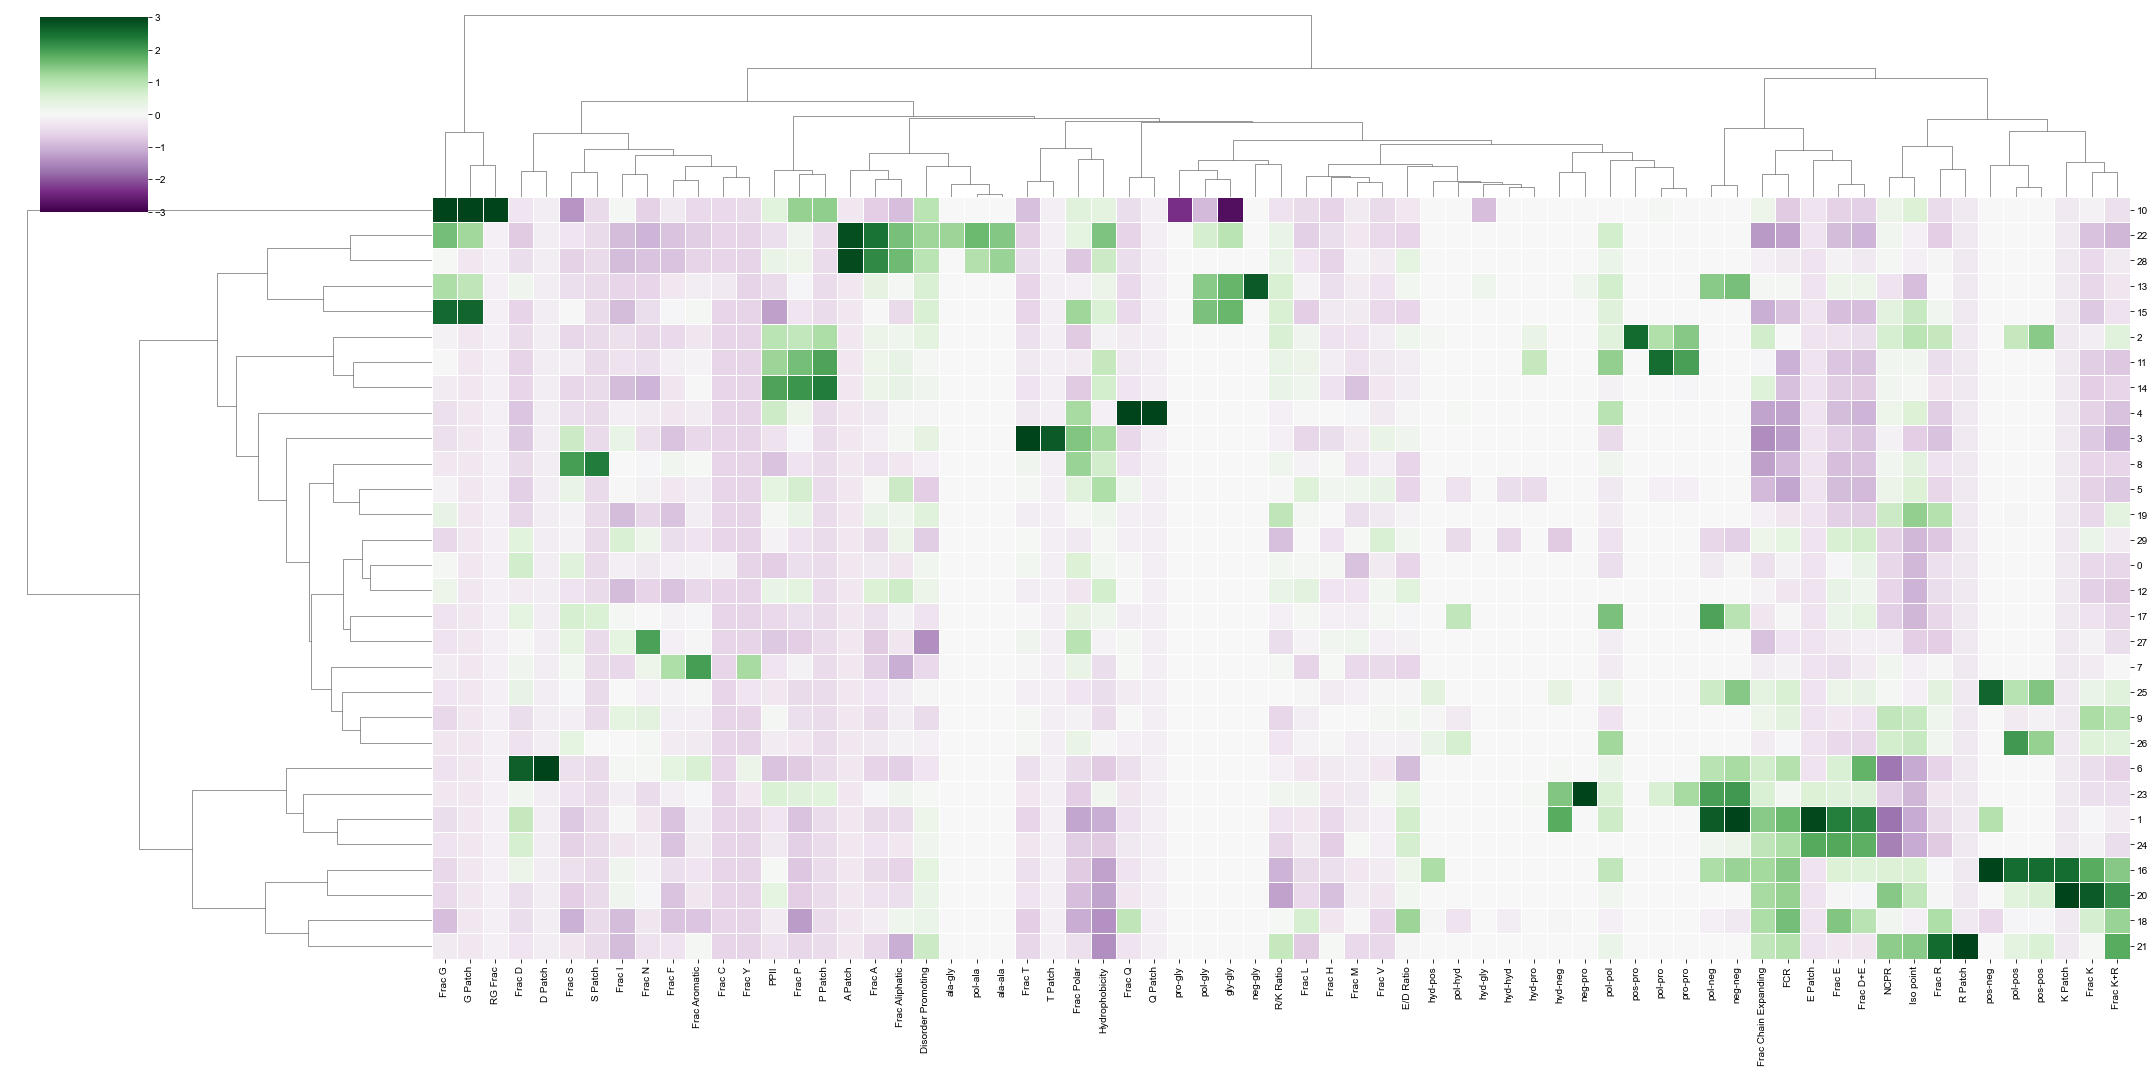

In [12]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.pyplot import gcf


# Extract just nucleolar IDRs
zvecaa_sub=zvecaa[allidx_sub,:]

medvalsbyclust15=np.zeros((numkclusts,len(myfeat)))

for c in range(0,numkclusts):
    print('Cluster_'+str(c))
    currclustpos=[i for i, ltr in enumerate(clusters) if ltr == c]

    for p in range(0,len(myfeat)): 

        czvec=[]
        for idx in currclustpos:
            czvec.append(zvecaa_sub[idx,p])
            
        medvalsbyclust15[c,p]=np.median(czvec)

p = [-3, -0.5, 0.5, 3]
f = lambda x: np.interp(x, p, [0, 0.5, 0.5, 1])

mycmap = LinearSegmentedColormap.from_list('map_white', 
              list(zip(np.linspace(0,1), plt.cm.PRGn(f(np.linspace(min(p), max(p)))))))
        
dfmed = pd.DataFrame(medvalsbyclust15, columns=myfeat)
dfmed = dfmed.loc[:, dfmed.std() > 0.1]
med_clustmap = sbn.clustermap(dfmed, metric="euclidean", method="ward",cmap='PRGn',figsize=(30, 15),vmin=-3,vmax=3,linewidth=0.5) 
#med_clustmap = sbn.clustermap(dfmed, metric="euclidean", method="ward",cmap=mycmap,figsize=(30, 15),vmin=-3,vmax=3,linewidth=0.5) 
plt.setp(med_clustmap.ax_heatmap.get_yticklabels(),rotation=0)
medrowindex=med_clustmap.dendrogram_row.reordered_ind
print(medrowindex)

#plt.savefig('All_sapien_IDRs_30_clusts_median_vals_clustermap.pdf', transparent=True, bbox_inches = "tight") 


## 2.7 - Extract which median z-score vector from IDRs 100 ≤ n ≤ 300 is closest to median z-score vector from all IDRs

In [13]:
clust30to15mapto=[]
clust30to15mapfrom=[]
for i in range(0,30):
    curr30vec=medvalsbyclust30[i,:]
    tmpdist=[]
    for j in range(0,30):
        curr15vec=medvalsbyclust15[j,:]
        tmpdist.append(np.linalg.norm(curr30vec - curr15vec))
    # if want to map all close clusters
    pos=[i for i, x in enumerate(tmpdist) if x<=3]
    for p in pos:
        clust30to15mapfrom.append(i)
        clust30to15mapto.append(p)
        
    # if only want to map to one cluster
    #clust30to15mapfrom.append(i)
    #clust30to15mapto.append(tmpdist.index(min(tmpdist)))
    #print(tmpdist)
    #print('C'+str(i)+': '+str(min(tmpdist)))

clust30to15df=pd.DataFrame()
clust30to15df['From']=clust30to15mapfrom
clust30to15df['To']=clust30to15mapto
print(clust30to15df)

print('Not able to map to')
for i in range(0,30):
    if i not in clust30to15mapto:
        print(i)

print('Not able to map from')
for i in range(0,30):
    if i not in clust30to15mapfrom:
        print(i)

    From  To
0      1  11
1      3  17
2      4   0
3      4  27
4      4  29
5      6   5
6      6   8
7      7   1
8      9  25
9     10   5
10    11   4
11    13  23
12    14   2
13    15   3
14    16  26
15    17   9
16    19  24
17    20  28
18    22  10
19    23  16
20    23  20
21    24   0
22    24  12
23    24  29
24    25  26
25    26  21
26    27   5
27    27  12
28    27  14
29    28   7
30    29  19
Not able to map to
6
13
15
18
22
Not able to map from
0
2
5
8
12
18
21


In [14]:
source=[]
target=[]
weight=[]

colorhex=['#d865a6','#7c2880','#e23a36','#e23a36','#e23a36','#231f20','#1f8241','#e23a36','#e23a36','#231f20','#189bd7','#1f8241','#231f20','#e23a36','#189bd7','#1f8241','#1f8241','#189bd7','#231f20','#e23a36','#8c8c8c','#7c2880','#d865a6','#231f20','#e23a36','#189bd7','#189bd7','#7c2880','#f58220','#189bd7']

mydictcolors={}
for i in range(0,len(clust30to15mapfrom)):
    source.append('C30: '+str(clust30to15mapfrom[i]))
    target.append('All C30: '+str(clust30to15mapto[i]))
    weight.append(1)
    mydictcolors['C30: '+str(clust30to15mapfrom[i])] = colorhex[clust30to15mapfrom[i]]
    

print(mydictcolors)

{'C30: 1': '#7c2880', 'C30: 3': '#e23a36', 'C30: 4': '#e23a36', 'C30: 6': '#1f8241', 'C30: 7': '#e23a36', 'C30: 9': '#231f20', 'C30: 10': '#189bd7', 'C30: 11': '#1f8241', 'C30: 13': '#e23a36', 'C30: 14': '#189bd7', 'C30: 15': '#1f8241', 'C30: 16': '#1f8241', 'C30: 17': '#189bd7', 'C30: 19': '#e23a36', 'C30: 20': '#8c8c8c', 'C30: 22': '#d865a6', 'C30: 23': '#231f20', 'C30: 24': '#e23a36', 'C30: 25': '#189bd7', 'C30: 26': '#189bd7', 'C30: 27': '#7c2880', 'C30: 28': '#f58220', 'C30: 29': '#189bd7'}


In [25]:
dftmp=pd.DataFrame()

dftmp['source']=source[:]
dftmp['target']=target[:]
dftmp['weight']=weight[:]
print(dftmp)

#with pd.ExcelWriter('../Supplementary_Tables/Table_S1.xlsx', engine='openpyxl',mode='a') as writer:
#    dftmp.to_excel(writer,sheet_name='Fig_S1B')

import d3blocks
from d3blocks import D3Blocks
d3 = D3Blocks(chart='SanKey', frame=True)

#tmpcolorlist=['#3d2663', '#872f74', '#cb3f73', '#ff6361','#276026', '#008770', '#00aabe', '#64c8ff']


d3.set_node_properties(dftmp,color=mydictcolors)
#d3.set_node_properties(dftmp, padding=1, color={'IDRs in complex in 10':'#1d9bd7','IDRs in complex in 11':'#218342', 'IDRs in complex in 28':'#f58220','IDRs in complex not in 10, 11, or 28':'#dddddd','No IDRs in Complex':'#dddddd', \
#                                     'RNA binding':'#276026', 'Enhanceosomes':'#3d2663', 'Chromatin remodeling complex':'#872f74', 'Histone modifying complex':'#cb3f73', 'RNA polymerase II-mediated transcription':'#ff6361'})
#d3.set_node_properties(dftmp, color=mycolorsdict)
d3.set_edge_properties(dftmp, color='target', opacity='target')
d3.show(figsize=[230, 800])

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Sankey]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/sankey.html]
[d3blocks] >INFO> Convert to DataFrame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Set [figsize]: [230, 800]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/d3blocks/sankey.html]


     source       target  weight
0    C30: 1  All C30: 11       1
1    C30: 3  All C30: 17       1
2    C30: 4   All C30: 0       1
3    C30: 4  All C30: 27       1
4    C30: 4  All C30: 29       1
5    C30: 6   All C30: 5       1
6    C30: 6   All C30: 8       1
7    C30: 7   All C30: 1       1
8    C30: 9  All C30: 25       1
9   C30: 10   All C30: 5       1
10  C30: 11   All C30: 4       1
11  C30: 13  All C30: 23       1
12  C30: 14   All C30: 2       1
13  C30: 15   All C30: 3       1
14  C30: 16  All C30: 26       1
15  C30: 17   All C30: 9       1
16  C30: 19  All C30: 24       1
17  C30: 20  All C30: 28       1
18  C30: 22  All C30: 10       1
19  C30: 23  All C30: 16       1
20  C30: 23  All C30: 20       1
21  C30: 24   All C30: 0       1
22  C30: 24  All C30: 12       1
23  C30: 24  All C30: 29       1
24  C30: 25  All C30: 26       1
25  C30: 26  All C30: 21       1
26  C30: 27   All C30: 5       1
27  C30: 27  All C30: 12       1
28  C30: 27  All C30: 14       1
29  C30: 2

[d3blocks] >INFO> Open browser: /tmp/d3blocks/sankey.html
